In [93]:
import numpy as np
import pandas as pd
import talib

In [94]:
import random
random.seed(1)

In [186]:
dataset = pd.read_csv('nas1.csv')
dataset = dataset.iloc[::-1]

In [189]:
dataset.head()

,date,close,volume,open,high,low
2517,2009/04/20,18.08,3638321.0,19.48,19.60,18.08
2516,2009/04/21,18.49,5592214.0,18.00,18.55,17.61
2515,2009/04/22,18.34,4636956.0,18.17,18.94,18.02
2514,2009/04/23,18.94,3725227.0,18.65,19.16,18.29
2513,2009/04/24,19.10,4262202.0,18.75,19.41,18.41


In [190]:
dataset.tail(5)

,date,close,volume,open,high,low
4,2019/04/12,87.80,647177.0,87.76,87.97,86.93
3,2019/04/15,88.47,368161.0,87.80,88.67,87.39
2,2019/04/16,89.75,536764.0,88.84,89.85,88.46
1,2019/04/17,90.20,457095.0,89.81,90.36,89.52
0,2019/04/18,89.99,556422.0,90.28,90.56,89.80


In [191]:
dataset.shape

(2518, 6)

In [192]:
dataset.isnull().sum()

date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64

In [193]:
dataset = dataset.dropna()


In [194]:
dataset.shape

(2518, 6)

In [196]:
dataset = dataset[['open', 'high', 'low', 'close','volume']]


In [197]:
dataset.head()

,open,high,low,close,volume
2517,19.48,19.60,18.08,18.08,3638321.0
2516,18.00,18.55,17.61,18.49,5592214.0
2515,18.17,18.94,18.02,18.34,4636956.0
2514,18.65,19.16,18.29,18.94,3725227.0
2513,18.75,19.41,18.41,19.10,4262202.0


In [198]:
77143764.0-47600787.0


29542977.0

In [200]:
dataset['change_vol'] = dataset['volume'].shift(-1) - dataset['volume']

In [201]:
dataset.head(10)

,open,high,low,close,volume,change_vol
2517,19.48,19.60,18.08,18.08,3638321.0,1953893.0
2516,18.00,18.55,17.61,18.49,5592214.0,-955258.0
2515,18.17,18.94,18.02,18.34,4636956.0,-911729.0
2514,18.65,19.16,18.29,18.94,3725227.0,536975.0
2513,18.75,19.41,18.41,19.10,4262202.0,-2043748.0
2512,18.65,19.13,18.54,18.72,2218454.0,962042.0
2511,18.42,18.71,18.12,18.16,3180496.0,-307701.0
2510,18.51,18.78,18.22,18.76,2872795.0,1666393.0
2509,19.00,19.80,19.00,19.23,4539188.0,-1549587.0
2508,19.04,19.80,19.01,19.36,2989601.0,519691.0


In [202]:
def check(vol):
    if vol>0:
        return 1
    else:
        return 0

In [203]:

dataset['change_vol_ud'] = dataset['change_vol'].apply(check)

In [204]:
dataset.head()

,open,high,low,close,volume,change_vol,change_vol_ud
2517,19.48,19.60,18.08,18.08,3638321.0,1953893.0,1
2516,18.00,18.55,17.61,18.49,5592214.0,-955258.0,0
2515,18.17,18.94,18.02,18.34,4636956.0,-911729.0,0
2514,18.65,19.16,18.29,18.94,3725227.0,536975.0,1
2513,18.75,19.41,18.41,19.10,4262202.0,-2043748.0,0


In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
dataset['close'].describe()

count    2518.000000
mean       45.840343
std        23.785867
min        17.300000
25%        23.975000
50%        38.840000
75%        67.370000
max        96.740000
Name: close, dtype: float64

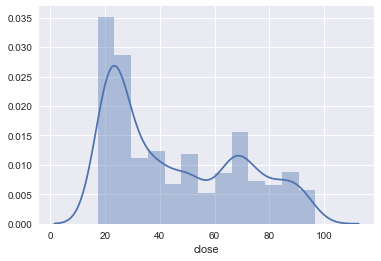

In [208]:
sns.distplot(dataset['close'])

In [210]:
dataset['H-L'] = dataset['high'] - dataset['low']
dataset['O-C'] = dataset['close'] - dataset['open']
dataset['3day MA'] = dataset['close'].shift(1).rolling(window = 4).mean()
dataset['10day MA'] = dataset['close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['close'].shift(1).rolling(window = 30).mean()
dataset['14day MA'] = dataset['close'].shift(1).rolling(window = 14).mean()
dataset['10day MA_open'] = dataset['open'].shift(1).rolling(window = 10).mean()

dataset['Std_dev']= dataset['close'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['close'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['high'].values, dataset['low'].values, dataset['close'].values, 14)


In [211]:
dataset.head()

,open,high,low,close,volume,change_vol,change_vol_ud,H-L,O-C,3day MA,10day MA,30day MA,14day MA,10day MA_open,Std_dev,RSI,Williams %R
2517,19.48,19.60,18.08,18.08,3638321.0,1953893.0,1,1.52,-1.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2516,18.00,18.55,17.61,18.49,5592214.0,-955258.0,0,0.94,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515,18.17,18.94,18.02,18.34,4636956.0,-911729.0,0,0.92,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2514,18.65,19.16,18.29,18.94,3725227.0,536975.0,1,0.87,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2513,18.75,19.41,18.41,19.10,4262202.0,-2043748.0,0,1.00,0.35,18.4625,NaN,NaN,NaN,NaN,0.422847,NaN,NaN


In [212]:
dataset['log_RSI'] = np.log(dataset['RSI'])

In [213]:
dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)


In [214]:
dataset = dataset.dropna()

In [215]:
dataset.corr()

,open,high,low,close,volume,change_vol,change_vol_ud,H-L,O-C,3day MA,10day MA,30day MA,14day MA,10day MA_open,Std_dev,RSI,Williams %R,log_RSI,Price_Rise
open,1.000000,0.999861,0.999847,0.999683,-0.481745,0.001878,0.019480,0.531293,-0.012446,0.999625,0.998962,0.997005,0.998520,0.998654,0.466353,0.053001,0.051557,0.037784,-0.005837
high,0.999861,1.000000,0.999801,0.999850,-0.478125,-0.000442,0.018035,0.539165,-0.000290,0.999559,0.998923,0.997041,0.998502,0.998623,0.470695,0.055607,0.054642,0.040211,-0.005873
low,0.999847,0.999801,1.000000,0.999848,-0.485165,0.003225,0.020578,0.522271,0.000208,0.999452,0.998767,0.996802,0.998321,0.998450,0.461824,0.058759,0.057057,0.043869,-0.006001
close,0.999683,0.999850,0.999848,1.000000,-0.481829,0.000938,0.019054,0.530757,0.012731,0.999339,0.998671,0.996762,0.998232,0.998357,0.466269,0.062040,0.061438,0.047100,-0.006304
volume,-0.481745,-0.478125,-0.485165,-0.481829,1.000000,-0.428343,-0.245644,0.043689,-0.003414,-0.479358,-0.478277,-0.474725,-0.477697,-0.478043,0.016672,-0.134291,-0.131823,-0.156922,0.012281
change_vol,0.001878,-0.000442,0.003225,0.000938,-0.428343,1.000000,0.509033,-0.155191,-0.037358,0.001154,0.000628,0.000525,0.000646,0.000601,-0.096396,0.003362,0.007797,0.015830,-0.035445
change_vol_ud,0.019480,0.018035,0.020578,0.019054,-0.245644,0.509033,1.000000,-0.097906,-0.016904,0.019470,0.019369,0.018455,0.019377,0.019446,-0.054366,-0.006514,0.001279,-0.000289,-0.038937
H-L,0.531293,0.539165,0.522271,0.530757,0.043689,-0.155191,-0.097906,1.000000,-0.021207,0.535024,0.536794,0.539328,0.537619,0.537374,0.624690,-0.103644,-0.073006,-0.133202,0.002320
O-C,-0.012446,-0.000290,0.000208,0.012731,-0.003414,-0.037358,-0.016904,-0.021207,1.000000,-0.011223,-0.011435,-0.009481,-0.011335,-0.011642,-0.003255,0.359048,0.392461,0.370027,-0.018546
3day MA,0.999625,0.999559,0.999452,0.999339,-0.479358,0.001154,0.019470,0.535024,-0.011223,1.000000,0.999575,0.997652,0.999174,0.999353,0.467719,0.038481,0.037683,0.023033,-0.005557


In [216]:
dataset.head(6)

,open,high,low,close,volume,change_vol,change_vol_ud,H-L,O-C,3day MA,10day MA,30day MA,14day MA,10day MA_open,Std_dev,RSI,Williams %R,log_RSI,Price_Rise
2487,20.83,21.76,20.6700,21.43,2775141.0,-218018.0,0,1.0900,0.60,20.6700,19.623,19.241333,19.162143,19.360,0.528271,65.731938,-11.312217,4.185585,0
2486,21.11,21.85,20.8600,21.19,2557123.0,1613965.0,1,0.9900,0.08,21.0250,19.887,19.353000,19.365714,19.638,0.280125,62.818465,-16.742081,4.140249,1
2485,21.34,22.35,21.3200,22.23,4171088.0,-819712.0,0,1.0300,0.89,21.1325,20.215,19.443000,19.620000,19.849,0.540019,69.425023,-2.536998,4.240247,0
2484,22.50,22.93,21.9000,22.00,3351376.0,-33564.0,0,1.0300,-0.50,21.4125,20.653,19.572667,19.925714,20.145,0.585107,66.485857,-17.514124,4.196989,0
2483,22.14,22.15,21.1401,21.42,3317812.0,-899165.0,0,1.0099,-0.72,21.7125,20.975,19.674667,20.220000,20.632,0.439238,59.356811,-28.436911,4.083567,1
2482,21.31,22.16,21.3100,22.05,2418647.0,-1039.0,0,0.8500,0.74,21.7100,21.178,19.752000,20.407857,20.954,0.447627,64.065297,-16.572505,4.159903,0


In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [218]:
#sns.distplot(dataset['Close'])

In [219]:
split = int(len(dataset)*0.7)


In [220]:
train = dataset[:split]

In [221]:
test = dataset[split:]

In [222]:
print(train.shape, test.shape)

(1740, 19) (747, 19)


In [223]:
import xgboost as xgb
import time
import math
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing


In [224]:
train = train
test = test
train_y = train.Price_Rise.astype('int')
train_x = train.drop(['Price_Rise'], axis=1)

test_price = test['Price_Rise']
test_x = test.drop(['Price_Rise'], axis=1)


In [225]:
train_x.head()

,open,high,low,close,volume,change_vol,change_vol_ud,H-L,O-C,3day MA,10day MA,30day MA,14day MA,10day MA_open,Std_dev,RSI,Williams %R,log_RSI
2487,20.83,21.76,20.6700,21.43,2775141.0,-218018.0,0,1.0900,0.60,20.6700,19.623,19.241333,19.162143,19.360,0.528271,65.731938,-11.312217,4.185585
2486,21.11,21.85,20.8600,21.19,2557123.0,1613965.0,1,0.9900,0.08,21.0250,19.887,19.353000,19.365714,19.638,0.280125,62.818465,-16.742081,4.140249
2485,21.34,22.35,21.3200,22.23,4171088.0,-819712.0,0,1.0300,0.89,21.1325,20.215,19.443000,19.620000,19.849,0.540019,69.425023,-2.536998,4.240247
2484,22.50,22.93,21.9000,22.00,3351376.0,-33564.0,0,1.0300,-0.50,21.4125,20.653,19.572667,19.925714,20.145,0.585107,66.485857,-17.514124,4.196989
2483,22.14,22.15,21.1401,21.42,3317812.0,-899165.0,0,1.0099,-0.72,21.7125,20.975,19.674667,20.220000,20.632,0.439238,59.356811,-28.436911,4.083567


In [226]:
def using_xgb(train_x, train_y, test_x):
    scale_val = (train_y.sum() / train_y.shape[0])
    X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, train_size=0.75, random_state=0)
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_val   = xgb.DMatrix(X_val,   label=y_val)
    xgb_test  = xgb.DMatrix(test_x)
    params = {
        'booster': 'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'early_stopping_rounds': 200,
        'gamma':0,
        'lambda': 1000,
        'min_child_weight': 6,#6
        'scale_pos_weight': scale_val,
        'subsample': 0.8,
        'max_depth':7,
        'eta': 0.03,
        'colsample_bytree': 0.7,
        'nthread': 3
    }
    watchlist = [(xgb_val, 'val'), (xgb_train, 'train')]
    num_round = 15000
    bst = xgb.train(params, xgb_train, num_boost_round=num_round, evals=watchlist)
    scores = bst.predict(xgb_test, ntree_limit=bst.best_ntree_limit)
    #predict_proba(xgb_test)[:,1]
    pred = np.where(scores > 0.5, 1,0)
    print((pd.value_counts(pred)))
    return pred, scores

In [227]:
print("load_data() end!")
pred, scores = using_xgb(train_x, train_y, test_x)


load_data() end!
[0]	val-auc:0.513543	train-auc:0.528819
[1]	val-auc:0.514864	train-auc:0.542906
[2]	val-auc:0.518444	train-auc:0.54279
[3]	val-auc:0.517741	train-auc:0.55366
[4]	val-auc:0.518103	train-auc:0.553192
[5]	val-auc:0.523537	train-auc:0.551796
[6]	val-auc:0.53205	train-auc:0.552933
[7]	val-auc:0.531955	train-auc:0.555856
[8]	val-auc:0.529397	train-auc:0.556877
[9]	val-auc:0.537261	train-auc:0.557609
[10]	val-auc:0.539925	train-auc:0.556185
[11]	val-auc:0.540095	train-auc:0.556566
[12]	val-auc:0.537879	train-auc:0.555301
[13]	val-auc:0.535908	train-auc:0.554288
[14]	val-auc:0.535119	train-auc:0.554664
[15]	val-auc:0.534736	train-auc:0.553263
[16]	val-auc:0.534991	train-auc:0.553172
[17]	val-auc:0.534704	train-auc:0.553307
[18]	val-auc:0.534768	train-auc:0.553165
[19]	val-auc:0.534853	train-auc:0.55312
[20]	val-auc:0.534768	train-auc:0.553267
[21]	val-auc:0.535002	train-auc:0.553233
[22]	val-auc:0.535279	train-auc:0.553289
[23]	val-auc:0.534895	train-auc:0.553285
[24]	val-auc:

[199]	val-auc:0.525775	train-auc:0.566243
[200]	val-auc:0.525839	train-auc:0.566215
[201]	val-auc:0.517826	train-auc:0.574537
[202]	val-auc:0.517528	train-auc:0.57449
[203]	val-auc:0.517336	train-auc:0.574658
[204]	val-auc:0.51741	train-auc:0.574677
[205]	val-auc:0.517741	train-auc:0.575135
[206]	val-auc:0.518039	train-auc:0.575593
[207]	val-auc:0.518039	train-auc:0.575528
[208]	val-auc:0.517762	train-auc:0.575472
[209]	val-auc:0.517538	train-auc:0.575451
[210]	val-auc:0.517464	train-auc:0.575105
[211]	val-auc:0.517251	train-auc:0.575349
[212]	val-auc:0.517144	train-auc:0.57531
[213]	val-auc:0.517517	train-auc:0.575404
[214]	val-auc:0.517453	train-auc:0.575418
[215]	val-auc:0.517474	train-auc:0.575392
[216]	val-auc:0.517432	train-auc:0.575371
[217]	val-auc:0.517048	train-auc:0.575386
[218]	val-auc:0.517006	train-auc:0.575331
[219]	val-auc:0.517283	train-auc:0.574409
[220]	val-auc:0.517069	train-auc:0.574438
[221]	val-auc:0.517517	train-auc:0.574497
[222]	val-auc:0.517549	train-auc:0.57

[395]	val-auc:0.519371	train-auc:0.605156
[396]	val-auc:0.519456	train-auc:0.605201
[397]	val-auc:0.519307	train-auc:0.605109
[398]	val-auc:0.518923	train-auc:0.605728
[399]	val-auc:0.518838	train-auc:0.605874
[400]	val-auc:0.519286	train-auc:0.606368
[401]	val-auc:0.518774	train-auc:0.606405
[402]	val-auc:0.51886	train-auc:0.606426
[403]	val-auc:0.518497	train-auc:0.606325
[404]	val-auc:0.518689	train-auc:0.606606
[405]	val-auc:0.518604	train-auc:0.606422
[406]	val-auc:0.518444	train-auc:0.606565
[407]	val-auc:0.518412	train-auc:0.607078
[408]	val-auc:0.518114	train-auc:0.607302
[409]	val-auc:0.518007	train-auc:0.607974
[410]	val-auc:0.517922	train-auc:0.607998
[411]	val-auc:0.517932	train-auc:0.608433
[412]	val-auc:0.517602	train-auc:0.608787
[413]	val-auc:0.517219	train-auc:0.608666
[414]	val-auc:0.51675	train-auc:0.609158
[415]	val-auc:0.516601	train-auc:0.609253
[416]	val-auc:0.516771	train-auc:0.609622
[417]	val-auc:0.516771	train-auc:0.609616
[418]	val-auc:0.516665	train-auc:0.6

[592]	val-auc:0.518689	train-auc:0.6389
[593]	val-auc:0.518732	train-auc:0.638897
[594]	val-auc:0.518561	train-auc:0.639181
[595]	val-auc:0.518412	train-auc:0.639343
[596]	val-auc:0.51822	train-auc:0.639507
[597]	val-auc:0.51822	train-auc:0.639474
[598]	val-auc:0.51805	train-auc:0.63968
[599]	val-auc:0.518476	train-auc:0.639816
[600]	val-auc:0.518646	train-auc:0.639807
[601]	val-auc:0.518476	train-auc:0.63995
[602]	val-auc:0.518582	train-auc:0.640319
[603]	val-auc:0.518444	train-auc:0.640494
[604]	val-auc:0.51871	train-auc:0.640686
[605]	val-auc:0.518636	train-auc:0.640575
[606]	val-auc:0.518668	train-auc:0.64085
[607]	val-auc:0.51854	train-auc:0.641141
[608]	val-auc:0.518774	train-auc:0.641063
[609]	val-auc:0.518625	train-auc:0.641274
[610]	val-auc:0.518433	train-auc:0.64152
[611]	val-auc:0.518625	train-auc:0.641407
[612]	val-auc:0.518774	train-auc:0.64151
[613]	val-auc:0.518582	train-auc:0.641802
[614]	val-auc:0.518561	train-auc:0.641855
[615]	val-auc:0.51822	train-auc:0.642061
[616]

[789]	val-auc:0.512743	train-auc:0.665963
[790]	val-auc:0.512829	train-auc:0.665867
[791]	val-auc:0.512786	train-auc:0.666208
[792]	val-auc:0.512722	train-auc:0.66622
[793]	val-auc:0.512552	train-auc:0.666257
[794]	val-auc:0.512189	train-auc:0.666387
[795]	val-auc:0.512189	train-auc:0.66637
[796]	val-auc:0.512168	train-auc:0.666378
[797]	val-auc:0.512125	train-auc:0.66651
[798]	val-auc:0.512317	train-auc:0.666662
[799]	val-auc:0.512317	train-auc:0.666846
[800]	val-auc:0.512445	train-auc:0.66673
[801]	val-auc:0.512147	train-auc:0.666803
[802]	val-auc:0.512168	train-auc:0.667064
[803]	val-auc:0.512019	train-auc:0.667093
[804]	val-auc:0.512019	train-auc:0.66714
[805]	val-auc:0.511998	train-auc:0.667184
[806]	val-auc:0.512062	train-auc:0.667422
[807]	val-auc:0.512211	train-auc:0.667619
[808]	val-auc:0.512403	train-auc:0.667711
[809]	val-auc:0.512168	train-auc:0.667773
[810]	val-auc:0.512381	train-auc:0.667886
[811]	val-auc:0.512488	train-auc:0.667904
[812]	val-auc:0.512275	train-auc:0.6680

[985]	val-auc:0.511401	train-auc:0.683568
[986]	val-auc:0.511294	train-auc:0.683678
[987]	val-auc:0.511422	train-auc:0.683661
[988]	val-auc:0.511358	train-auc:0.683777
[989]	val-auc:0.511337	train-auc:0.683935
[990]	val-auc:0.511337	train-auc:0.684052
[991]	val-auc:0.511465	train-auc:0.68398
[992]	val-auc:0.511507	train-auc:0.684048
[993]	val-auc:0.511507	train-auc:0.684196
[994]	val-auc:0.511337	train-auc:0.684229
[995]	val-auc:0.511294	train-auc:0.684344
[996]	val-auc:0.511103	train-auc:0.684415
[997]	val-auc:0.511209	train-auc:0.684556
[998]	val-auc:0.511103	train-auc:0.684733
[999]	val-auc:0.511103	train-auc:0.684782
[1000]	val-auc:0.511124	train-auc:0.684827
[1001]	val-auc:0.511081	train-auc:0.684897
[1002]	val-auc:0.511294	train-auc:0.684989
[1003]	val-auc:0.511337	train-auc:0.685006
[1004]	val-auc:0.511358	train-auc:0.685096
[1005]	val-auc:0.511337	train-auc:0.685095
[1006]	val-auc:0.511422	train-auc:0.685191
[1007]	val-auc:0.511422	train-auc:0.68521
[1008]	val-auc:0.511444	trai

[1177]	val-auc:0.507352	train-auc:0.699063
[1178]	val-auc:0.507437	train-auc:0.699069
[1179]	val-auc:0.507672	train-auc:0.699222
[1180]	val-auc:0.507501	train-auc:0.699236
[1181]	val-auc:0.507821	train-auc:0.69929
[1182]	val-auc:0.5078	train-auc:0.699391
[1183]	val-auc:0.507885	train-auc:0.699499
[1184]	val-auc:0.507821	train-auc:0.699556
[1185]	val-auc:0.507395	train-auc:0.699725
[1186]	val-auc:0.507373	train-auc:0.699798
[1187]	val-auc:0.507118	train-auc:0.699779
[1188]	val-auc:0.507096	train-auc:0.699916
[1189]	val-auc:0.507139	train-auc:0.700104
[1190]	val-auc:0.507182	train-auc:0.700243
[1191]	val-auc:0.507054	train-auc:0.700283
[1192]	val-auc:0.507096	train-auc:0.700285
[1193]	val-auc:0.507309	train-auc:0.700337
[1194]	val-auc:0.507352	train-auc:0.700304
[1195]	val-auc:0.507416	train-auc:0.700342
[1196]	val-auc:0.507544	train-auc:0.700377
[1197]	val-auc:0.507437	train-auc:0.700516
[1198]	val-auc:0.507267	train-auc:0.700565
[1199]	val-auc:0.507288	train-auc:0.700683
[1200]	val-auc

[1369]	val-auc:0.505732	train-auc:0.712334
[1370]	val-auc:0.505754	train-auc:0.712463
[1371]	val-auc:0.505626	train-auc:0.712601
[1372]	val-auc:0.505562	train-auc:0.712602
[1373]	val-auc:0.505669	train-auc:0.712663
[1374]	val-auc:0.505626	train-auc:0.712694
[1375]	val-auc:0.505541	train-auc:0.712729
[1376]	val-auc:0.505541	train-auc:0.712802
[1377]	val-auc:0.50537	train-auc:0.712844
[1378]	val-auc:0.505157	train-auc:0.712892
[1379]	val-auc:0.505114	train-auc:0.713023
[1380]	val-auc:0.505242	train-auc:0.713012
[1381]	val-auc:0.50537	train-auc:0.713096
[1382]	val-auc:0.505413	train-auc:0.713155
[1383]	val-auc:0.505136	train-auc:0.713216
[1384]	val-auc:0.505178	train-auc:0.713287
[1385]	val-auc:0.505264	train-auc:0.713282
[1386]	val-auc:0.505114	train-auc:0.713278
[1387]	val-auc:0.504944	train-auc:0.713309
[1388]	val-auc:0.505221	train-auc:0.713398
[1389]	val-auc:0.5052	train-auc:0.713405
[1390]	val-auc:0.505413	train-auc:0.713414
[1391]	val-auc:0.505498	train-auc:0.713386
[1392]	val-auc:

[1561]	val-auc:0.502898	train-auc:0.723373
[1562]	val-auc:0.50277	train-auc:0.723434
[1563]	val-auc:0.502685	train-auc:0.723495
[1564]	val-auc:0.502653	train-auc:0.723545
[1565]	val-auc:0.502728	train-auc:0.723637
[1566]	val-auc:0.502579	train-auc:0.723766
[1567]	val-auc:0.502728	train-auc:0.723865
[1568]	val-auc:0.502515	train-auc:0.723794
[1569]	val-auc:0.502429	train-auc:0.723891
[1570]	val-auc:0.502344	train-auc:0.723909
[1571]	val-auc:0.502323	train-auc:0.723968
[1572]	val-auc:0.502259	train-auc:0.724048
[1573]	val-auc:0.502152	train-auc:0.724138
[1574]	val-auc:0.502174	train-auc:0.724191
[1575]	val-auc:0.502216	train-auc:0.724227
[1576]	val-auc:0.502067	train-auc:0.724328
[1577]	val-auc:0.502088	train-auc:0.724399
[1578]	val-auc:0.502131	train-auc:0.724432
[1579]	val-auc:0.502003	train-auc:0.724437
[1580]	val-auc:0.50211	train-auc:0.7245
[1581]	val-auc:0.502067	train-auc:0.724561
[1582]	val-auc:0.502152	train-auc:0.724528
[1583]	val-auc:0.502152	train-auc:0.724597
[1584]	val-auc:

[1753]	val-auc:0.500725	train-auc:0.732534
[1754]	val-auc:0.500703	train-auc:0.732642
[1755]	val-auc:0.500874	train-auc:0.732741
[1756]	val-auc:0.500767	train-auc:0.73276
[1757]	val-auc:0.500746	train-auc:0.73276
[1758]	val-auc:0.500746	train-auc:0.732892
[1759]	val-auc:0.500895	train-auc:0.732951
[1760]	val-auc:0.500895	train-auc:0.732941
[1761]	val-auc:0.500767	train-auc:0.732991
[1762]	val-auc:0.500448	train-auc:0.73304
[1763]	val-auc:0.500597	train-auc:0.733125
[1764]	val-auc:0.500511	train-auc:0.733231
[1765]	val-auc:0.500511	train-auc:0.733308
[1766]	val-auc:0.500661	train-auc:0.733339
[1767]	val-auc:0.500597	train-auc:0.733326
[1768]	val-auc:0.500639	train-auc:0.733362
[1769]	val-auc:0.500682	train-auc:0.733395
[1770]	val-auc:0.500746	train-auc:0.733459
[1771]	val-auc:0.500661	train-auc:0.733551
[1772]	val-auc:0.500693	train-auc:0.73357
[1773]	val-auc:0.500639	train-auc:0.733598
[1774]	val-auc:0.500554	train-auc:0.733661
[1775]	val-auc:0.500639	train-auc:0.733645
[1776]	val-auc:

[1945]	val-auc:0.497976	train-auc:0.74138
[1946]	val-auc:0.498039	train-auc:0.741446
[1947]	val-auc:0.497805	train-auc:0.741542
[1948]	val-auc:0.497613	train-auc:0.741575
[1949]	val-auc:0.497848	train-auc:0.741639
[1950]	val-auc:0.497954	train-auc:0.741667
[1951]	val-auc:0.497912	train-auc:0.741714
[1952]	val-auc:0.497826	train-auc:0.741745
[1953]	val-auc:0.497933	train-auc:0.741702
[1954]	val-auc:0.497784	train-auc:0.741797
[1955]	val-auc:0.497741	train-auc:0.7419
[1956]	val-auc:0.497741	train-auc:0.741966
[1957]	val-auc:0.497826	train-auc:0.74202
[1958]	val-auc:0.497848	train-auc:0.741987
[1959]	val-auc:0.49789	train-auc:0.741991
[1960]	val-auc:0.497954	train-auc:0.742048
[1961]	val-auc:0.498061	train-auc:0.742154
[1962]	val-auc:0.498018	train-auc:0.742206
[1963]	val-auc:0.497869	train-auc:0.742211
[1964]	val-auc:0.497912	train-auc:0.742258
[1965]	val-auc:0.49772	train-auc:0.742317
[1966]	val-auc:0.497762	train-auc:0.742368
[1967]	val-auc:0.497549	train-auc:0.742427
[1968]	val-auc:0.

[2137]	val-auc:0.495013	train-auc:0.751
[2138]	val-auc:0.495013	train-auc:0.75104
[2139]	val-auc:0.495099	train-auc:0.751184
[2140]	val-auc:0.495141	train-auc:0.751207
[2141]	val-auc:0.494949	train-auc:0.751203
[2142]	val-auc:0.494864	train-auc:0.751279
[2143]	val-auc:0.494822	train-auc:0.75133
[2144]	val-auc:0.494672	train-auc:0.751332
[2145]	val-auc:0.494694	train-auc:0.751352
[2146]	val-auc:0.494694	train-auc:0.751377
[2147]	val-auc:0.4948	train-auc:0.751417
[2148]	val-auc:0.494587	train-auc:0.751501
[2149]	val-auc:0.494523	train-auc:0.751617
[2150]	val-auc:0.494502	train-auc:0.751675
[2151]	val-auc:0.494502	train-auc:0.751736
[2152]	val-auc:0.494502	train-auc:0.751744
[2153]	val-auc:0.494332	train-auc:0.751704
[2154]	val-auc:0.494246	train-auc:0.751723
[2155]	val-auc:0.494225	train-auc:0.751781
[2156]	val-auc:0.494054	train-auc:0.751876
[2157]	val-auc:0.493969	train-auc:0.751878
[2158]	val-auc:0.494225	train-auc:0.751864
[2159]	val-auc:0.494097	train-auc:0.751904
[2160]	val-auc:0.4

[2329]	val-auc:0.491902	train-auc:0.759054
[2330]	val-auc:0.491774	train-auc:0.759126
[2331]	val-auc:0.491689	train-auc:0.759173
[2332]	val-auc:0.491753	train-auc:0.759225
[2333]	val-auc:0.491902	train-auc:0.759232
[2334]	val-auc:0.492009	train-auc:0.759319
[2335]	val-auc:0.491753	train-auc:0.759328
[2336]	val-auc:0.491796	train-auc:0.759272
[2337]	val-auc:0.49186	train-auc:0.759359
[2338]	val-auc:0.491838	train-auc:0.759408
[2339]	val-auc:0.491817	train-auc:0.759453
[2340]	val-auc:0.491923	train-auc:0.759493
[2341]	val-auc:0.492158	train-auc:0.759546
[2342]	val-auc:0.492179	train-auc:0.759547
[2343]	val-auc:0.492264	train-auc:0.759582
[2344]	val-auc:0.492137	train-auc:0.759535
[2345]	val-auc:0.492179	train-auc:0.759502
[2346]	val-auc:0.492115	train-auc:0.75958
[2347]	val-auc:0.492094	train-auc:0.759681
[2348]	val-auc:0.492158	train-auc:0.759721
[2349]	val-auc:0.492051	train-auc:0.75978
[2350]	val-auc:0.492137	train-auc:0.759837
[2351]	val-auc:0.492264	train-auc:0.759874
[2352]	val-auc

[2521]	val-auc:0.490368	train-auc:0.766299
[2522]	val-auc:0.490283	train-auc:0.766381
[2523]	val-auc:0.49041	train-auc:0.766435
[2524]	val-auc:0.490346	train-auc:0.766426
[2525]	val-auc:0.490283	train-auc:0.766497
[2526]	val-auc:0.490496	train-auc:0.766567
[2527]	val-auc:0.490517	train-auc:0.766619
[2528]	val-auc:0.490581	train-auc:0.766652
[2529]	val-auc:0.49056	train-auc:0.766612
[2530]	val-auc:0.490602	train-auc:0.766612
[2531]	val-auc:0.490645	train-auc:0.766656
[2532]	val-auc:0.490687	train-auc:0.766717
[2533]	val-auc:0.490687	train-auc:0.766727
[2534]	val-auc:0.490581	train-auc:0.766822
[2535]	val-auc:0.49056	train-auc:0.766786
[2536]	val-auc:0.490496	train-auc:0.766903
[2537]	val-auc:0.49073	train-auc:0.766922
[2538]	val-auc:0.490666	train-auc:0.766939
[2539]	val-auc:0.490879	train-auc:0.766995
[2540]	val-auc:0.490794	train-auc:0.767054
[2541]	val-auc:0.490773	train-auc:0.767054
[2542]	val-auc:0.490645	train-auc:0.76704
[2543]	val-auc:0.490602	train-auc:0.767016
[2544]	val-auc:0

[2713]	val-auc:0.488556	train-auc:0.773907
[2714]	val-auc:0.488684	train-auc:0.773916
[2715]	val-auc:0.488642	train-auc:0.773973
[2716]	val-auc:0.488706	train-auc:0.773991
[2717]	val-auc:0.488514	train-auc:0.773996
[2718]	val-auc:0.488514	train-auc:0.773977
[2719]	val-auc:0.488471	train-auc:0.77406
[2720]	val-auc:0.48862	train-auc:0.774104
[2721]	val-auc:0.488556	train-auc:0.774216
[2722]	val-auc:0.488663	train-auc:0.774253
[2723]	val-auc:0.488556	train-auc:0.774307
[2724]	val-auc:0.488599	train-auc:0.774351
[2725]	val-auc:0.488471	train-auc:0.774391
[2726]	val-auc:0.488663	train-auc:0.774469
[2727]	val-auc:0.488493	train-auc:0.774486
[2728]	val-auc:0.48862	train-auc:0.774504
[2729]	val-auc:0.488706	train-auc:0.774486
[2730]	val-auc:0.488642	train-auc:0.774507
[2731]	val-auc:0.488684	train-auc:0.774488
[2732]	val-auc:0.488578	train-auc:0.774514
[2733]	val-auc:0.488663	train-auc:0.774502
[2734]	val-auc:0.48877	train-auc:0.774539
[2735]	val-auc:0.488833	train-auc:0.774576
[2736]	val-auc:

[2905]	val-auc:0.488152	train-auc:0.780089
[2906]	val-auc:0.488173	train-auc:0.780131
[2907]	val-auc:0.488088	train-auc:0.780122
[2908]	val-auc:0.487949	train-auc:0.780129
[2909]	val-auc:0.488002	train-auc:0.780185
[2910]	val-auc:0.48813	train-auc:0.780222
[2911]	val-auc:0.48813	train-auc:0.780263
[2912]	val-auc:0.488109	train-auc:0.780239
[2913]	val-auc:0.488152	train-auc:0.780235
[2914]	val-auc:0.488045	train-auc:0.780293
[2915]	val-auc:0.488066	train-auc:0.780279
[2916]	val-auc:0.487896	train-auc:0.780319
[2917]	val-auc:0.487938	train-auc:0.7803
[2918]	val-auc:0.487981	train-auc:0.780366
[2919]	val-auc:0.488002	train-auc:0.780411
[2920]	val-auc:0.488045	train-auc:0.780399
[2921]	val-auc:0.488088	train-auc:0.780489
[2922]	val-auc:0.488152	train-auc:0.780529
[2923]	val-auc:0.488066	train-auc:0.780606
[2924]	val-auc:0.488002	train-auc:0.780679
[2925]	val-auc:0.48796	train-auc:0.780708
[2926]	val-auc:0.487853	train-auc:0.780759
[2927]	val-auc:0.487832	train-auc:0.780825
[2928]	val-auc:0

[3097]	val-auc:0.486745	train-auc:0.786315
[3098]	val-auc:0.486681	train-auc:0.786325
[3099]	val-auc:0.486553	train-auc:0.786417
[3100]	val-auc:0.486532	train-auc:0.786482
[3101]	val-auc:0.486532	train-auc:0.786464
[3102]	val-auc:0.486447	train-auc:0.786525
[3103]	val-auc:0.486383	train-auc:0.786584
[3104]	val-auc:0.486468	train-auc:0.786595
[3105]	val-auc:0.486383	train-auc:0.786654
[3106]	val-auc:0.48634	train-auc:0.786708
[3107]	val-auc:0.486212	train-auc:0.786746
[3108]	val-auc:0.48617	train-auc:0.786739
[3109]	val-auc:0.486255	train-auc:0.786755
[3110]	val-auc:0.48617	train-auc:0.786755
[3111]	val-auc:0.486127	train-auc:0.786774
[3112]	val-auc:0.485999	train-auc:0.786793
[3113]	val-auc:0.486127	train-auc:0.786894
[3114]	val-auc:0.485999	train-auc:0.786941
[3115]	val-auc:0.486127	train-auc:0.78701
[3116]	val-auc:0.486148	train-auc:0.787052
[3117]	val-auc:0.485999	train-auc:0.787045
[3118]	val-auc:0.485999	train-auc:0.787053
[3119]	val-auc:0.485893	train-auc:0.787045
[3120]	val-auc:

[3289]	val-auc:0.485893	train-auc:0.792081
[3290]	val-auc:0.48585	train-auc:0.792151
[3291]	val-auc:0.485701	train-auc:0.792189
[3292]	val-auc:0.485744	train-auc:0.79221
[3293]	val-auc:0.48568	train-auc:0.792206
[3294]	val-auc:0.48568	train-auc:0.792281
[3295]	val-auc:0.485637	train-auc:0.792286
[3296]	val-auc:0.485658	train-auc:0.792286
[3297]	val-auc:0.485552	train-auc:0.792311
[3298]	val-auc:0.485488	train-auc:0.79238
[3299]	val-auc:0.48536	train-auc:0.792399
[3300]	val-auc:0.485466	train-auc:0.792441
[3301]	val-auc:0.485594	train-auc:0.792463
[3302]	val-auc:0.485658	train-auc:0.792502
[3303]	val-auc:0.485594	train-auc:0.792509
[3304]	val-auc:0.485701	train-auc:0.792516
[3305]	val-auc:0.485701	train-auc:0.792592
[3306]	val-auc:0.485552	train-auc:0.792627
[3307]	val-auc:0.485573	train-auc:0.792599
[3308]	val-auc:0.485488	train-auc:0.792624
[3309]	val-auc:0.485573	train-auc:0.792653
[3310]	val-auc:0.485594	train-auc:0.792639
[3311]	val-auc:0.485637	train-auc:0.792655
[3312]	val-auc:0.

[3481]	val-auc:0.483591	train-auc:0.797816
[3482]	val-auc:0.483613	train-auc:0.797882
[3483]	val-auc:0.483591	train-auc:0.797915
[3484]	val-auc:0.483591	train-auc:0.797931
[3485]	val-auc:0.483634	train-auc:0.797917
[3486]	val-auc:0.483591	train-auc:0.797936
[3487]	val-auc:0.483634	train-auc:0.797926
[3488]	val-auc:0.483549	train-auc:0.79798
[3489]	val-auc:0.483549	train-auc:0.798056
[3490]	val-auc:0.48357	train-auc:0.798063
[3491]	val-auc:0.483655	train-auc:0.7981
[3492]	val-auc:0.483591	train-auc:0.798143
[3493]	val-auc:0.48357	train-auc:0.798124
[3494]	val-auc:0.483634	train-auc:0.798185
[3495]	val-auc:0.483549	train-auc:0.798166
[3496]	val-auc:0.483463	train-auc:0.798206
[3497]	val-auc:0.483399	train-auc:0.798223
[3498]	val-auc:0.48341	train-auc:0.798249
[3499]	val-auc:0.483303	train-auc:0.798315
[3500]	val-auc:0.483378	train-auc:0.798305
[3501]	val-auc:0.483399	train-auc:0.798319
[3502]	val-auc:0.483399	train-auc:0.798277
[3503]	val-auc:0.483442	train-auc:0.798303
[3504]	val-auc:0.

[3673]	val-auc:0.482994	train-auc:0.802718
[3674]	val-auc:0.483058	train-auc:0.802725
[3675]	val-auc:0.482973	train-auc:0.802749
[3676]	val-auc:0.482973	train-auc:0.802795
[3677]	val-auc:0.48308	train-auc:0.802813
[3678]	val-auc:0.483101	train-auc:0.802854
[3679]	val-auc:0.482909	train-auc:0.802927
[3680]	val-auc:0.482952	train-auc:0.802986
[3681]	val-auc:0.483037	train-auc:0.803016
[3682]	val-auc:0.482973	train-auc:0.803033
[3683]	val-auc:0.48308	train-auc:0.803075
[3684]	val-auc:0.483037	train-auc:0.803122
[3685]	val-auc:0.482803	train-auc:0.803176
[3686]	val-auc:0.482824	train-auc:0.803221
[3687]	val-auc:0.482888	train-auc:0.803245
[3688]	val-auc:0.483037	train-auc:0.803285
[3689]	val-auc:0.483016	train-auc:0.803355
[3690]	val-auc:0.482888	train-auc:0.803327
[3691]	val-auc:0.483058	train-auc:0.803358
[3692]	val-auc:0.483016	train-auc:0.803409
[3693]	val-auc:0.48308	train-auc:0.803482
[3694]	val-auc:0.483101	train-auc:0.803572
[3695]	val-auc:0.483101	train-auc:0.803598
[3696]	val-auc

[3865]	val-auc:0.483058	train-auc:0.807956
[3866]	val-auc:0.483144	train-auc:0.808029
[3867]	val-auc:0.483208	train-auc:0.808031
[3868]	val-auc:0.483122	train-auc:0.808045
[3869]	val-auc:0.48308	train-auc:0.808137
[3870]	val-auc:0.483144	train-auc:0.808156
[3871]	val-auc:0.48308	train-auc:0.808191
[3872]	val-auc:0.483058	train-auc:0.808269
[3873]	val-auc:0.483186	train-auc:0.808311
[3874]	val-auc:0.483037	train-auc:0.808299
[3875]	val-auc:0.483144	train-auc:0.808314
[3876]	val-auc:0.483229	train-auc:0.808342
[3877]	val-auc:0.48308	train-auc:0.808351
[3878]	val-auc:0.483101	train-auc:0.808396
[3879]	val-auc:0.483037	train-auc:0.808436
[3880]	val-auc:0.482909	train-auc:0.808503
[3881]	val-auc:0.482888	train-auc:0.80849
[3882]	val-auc:0.482888	train-auc:0.808521
[3883]	val-auc:0.48308	train-auc:0.808532
[3884]	val-auc:0.48308	train-auc:0.808561
[3885]	val-auc:0.482845	train-auc:0.808554
[3886]	val-auc:0.48276	train-auc:0.808619
[3887]	val-auc:0.482717	train-auc:0.808655
[3888]	val-auc:0.4

[4057]	val-auc:0.482568	train-auc:0.813004
[4058]	val-auc:0.48259	train-auc:0.813013
[4059]	val-auc:0.48259	train-auc:0.813058
[4060]	val-auc:0.482632	train-auc:0.813084
[4061]	val-auc:0.482568	train-auc:0.813033
[4062]	val-auc:0.482632	train-auc:0.813053
[4063]	val-auc:0.48259	train-auc:0.813062
[4064]	val-auc:0.482568	train-auc:0.813084
[4065]	val-auc:0.48259	train-auc:0.813088
[4066]	val-auc:0.482483	train-auc:0.813112
[4067]	val-auc:0.482547	train-auc:0.813173
[4068]	val-auc:0.482568	train-auc:0.813215
[4069]	val-auc:0.482696	train-auc:0.813272
[4070]	val-auc:0.482696	train-auc:0.813293
[4071]	val-auc:0.482675	train-auc:0.813326
[4072]	val-auc:0.482675	train-auc:0.813415
[4073]	val-auc:0.482739	train-auc:0.813439
[4074]	val-auc:0.482696	train-auc:0.813415
[4075]	val-auc:0.482717	train-auc:0.813397
[4076]	val-auc:0.482717	train-auc:0.813394
[4077]	val-auc:0.482739	train-auc:0.813418
[4078]	val-auc:0.482803	train-auc:0.813484
[4079]	val-auc:0.482973	train-auc:0.813526
[4080]	val-auc:

[4249]	val-auc:0.483016	train-auc:0.817665
[4250]	val-auc:0.483016	train-auc:0.817701
[4251]	val-auc:0.483016	train-auc:0.817734
[4252]	val-auc:0.482931	train-auc:0.817764
[4253]	val-auc:0.482931	train-auc:0.81779
[4254]	val-auc:0.482931	train-auc:0.817849
[4255]	val-auc:0.482994	train-auc:0.817832
[4256]	val-auc:0.482909	train-auc:0.817858
[4257]	val-auc:0.482781	train-auc:0.817927
[4258]	val-auc:0.482824	train-auc:0.817957
[4259]	val-auc:0.482888	train-auc:0.817934
[4260]	val-auc:0.482931	train-auc:0.817924
[4261]	val-auc:0.482909	train-auc:0.817936
[4262]	val-auc:0.482845	train-auc:0.817974
[4263]	val-auc:0.482824	train-auc:0.818018
[4264]	val-auc:0.482717	train-auc:0.818009
[4265]	val-auc:0.482824	train-auc:0.81803
[4266]	val-auc:0.482803	train-auc:0.818089
[4267]	val-auc:0.482675	train-auc:0.818087
[4268]	val-auc:0.482792	train-auc:0.818122
[4269]	val-auc:0.482686	train-auc:0.818155
[4270]	val-auc:0.48276	train-auc:0.818152
[4271]	val-auc:0.482611	train-auc:0.818134
[4272]	val-auc

[4441]	val-auc:0.481055	train-auc:0.822028
[4442]	val-auc:0.481141	train-auc:0.822012
[4443]	val-auc:0.481077	train-auc:0.821984
[4444]	val-auc:0.481034	train-auc:0.822026
[4445]	val-auc:0.481034	train-auc:0.822089
[4446]	val-auc:0.481183	train-auc:0.822094
[4447]	val-auc:0.481311	train-auc:0.822125
[4448]	val-auc:0.48129	train-auc:0.822137
[4449]	val-auc:0.481204	train-auc:0.822184
[4450]	val-auc:0.481268	train-auc:0.822191
[4451]	val-auc:0.481162	train-auc:0.822181
[4452]	val-auc:0.481226	train-auc:0.822177
[4453]	val-auc:0.481226	train-auc:0.822228
[4454]	val-auc:0.481055	train-auc:0.822304
[4455]	val-auc:0.481204	train-auc:0.822275
[4456]	val-auc:0.481204	train-auc:0.822327
[4457]	val-auc:0.481119	train-auc:0.822386
[4458]	val-auc:0.481077	train-auc:0.822365
[4459]	val-auc:0.480991	train-auc:0.82244
[4460]	val-auc:0.481055	train-auc:0.822466
[4461]	val-auc:0.481098	train-auc:0.822468
[4462]	val-auc:0.481098	train-auc:0.822478
[4463]	val-auc:0.481055	train-auc:0.822468
[4464]	val-au

[4633]	val-auc:0.47999	train-auc:0.826252
[4634]	val-auc:0.480054	train-auc:0.826262
[4635]	val-auc:0.480096	train-auc:0.826288
[4636]	val-auc:0.480118	train-auc:0.826316
[4637]	val-auc:0.480118	train-auc:0.826316
[4638]	val-auc:0.480032	train-auc:0.826322
[4639]	val-auc:0.480139	train-auc:0.826374
[4640]	val-auc:0.48016	train-auc:0.826412
[4641]	val-auc:0.480246	train-auc:0.826424
[4642]	val-auc:0.480203	train-auc:0.826438
[4643]	val-auc:0.480352	train-auc:0.82645
[4644]	val-auc:0.480395	train-auc:0.82649
[4645]	val-auc:0.480331	train-auc:0.826504
[4646]	val-auc:0.480331	train-auc:0.826514
[4647]	val-auc:0.480331	train-auc:0.826554
[4648]	val-auc:0.480373	train-auc:0.826582
[4649]	val-auc:0.480395	train-auc:0.826603
[4650]	val-auc:0.480416	train-auc:0.826608
[4651]	val-auc:0.480459	train-auc:0.826634
[4652]	val-auc:0.480224	train-auc:0.82662
[4653]	val-auc:0.480267	train-auc:0.826657
[4654]	val-auc:0.480288	train-auc:0.826702
[4655]	val-auc:0.480256	train-auc:0.826731
[4656]	val-auc:0

[4825]	val-auc:0.479862	train-auc:0.829973
[4826]	val-auc:0.479841	train-auc:0.829973
[4827]	val-auc:0.479947	train-auc:0.829968
[4828]	val-auc:0.479968	train-auc:0.82998
[4829]	val-auc:0.480096	train-auc:0.829989
[4830]	val-auc:0.480032	train-auc:0.829996
[4831]	val-auc:0.480032	train-auc:0.830043
[4832]	val-auc:0.480182	train-auc:0.830067
[4833]	val-auc:0.480224	train-auc:0.830081
[4834]	val-auc:0.480203	train-auc:0.830122
[4835]	val-auc:0.480246	train-auc:0.830152
[4836]	val-auc:0.480182	train-auc:0.830145
[4837]	val-auc:0.480224	train-auc:0.830234
[4838]	val-auc:0.480118	train-auc:0.830253
[4839]	val-auc:0.48016	train-auc:0.830246
[4840]	val-auc:0.48016	train-auc:0.830239
[4841]	val-auc:0.480182	train-auc:0.830239
[4842]	val-auc:0.480246	train-auc:0.830218
[4843]	val-auc:0.480139	train-auc:0.830265
[4844]	val-auc:0.480096	train-auc:0.830284
[4845]	val-auc:0.480182	train-auc:0.830345
[4846]	val-auc:0.480096	train-auc:0.830368
[4847]	val-auc:0.479968	train-auc:0.830469
[4848]	val-auc

[5017]	val-auc:0.479095	train-auc:0.833174
[5018]	val-auc:0.47918	train-auc:0.833204
[5019]	val-auc:0.479052	train-auc:0.833226
[5020]	val-auc:0.479116	train-auc:0.83322
[5021]	val-auc:0.47901	train-auc:0.833286
[5022]	val-auc:0.479031	train-auc:0.833303
[5023]	val-auc:0.479095	train-auc:0.833345
[5024]	val-auc:0.478946	train-auc:0.833347
[5025]	val-auc:0.478924	train-auc:0.833371
[5026]	val-auc:0.479052	train-auc:0.833418
[5027]	val-auc:0.478903	train-auc:0.833486
[5028]	val-auc:0.478924	train-auc:0.833503
[5029]	val-auc:0.478818	train-auc:0.83351
[5030]	val-auc:0.478924	train-auc:0.833507
[5031]	val-auc:0.478882	train-auc:0.833533
[5032]	val-auc:0.478839	train-auc:0.833524
[5033]	val-auc:0.47886	train-auc:0.833505
[5034]	val-auc:0.478903	train-auc:0.833519
[5035]	val-auc:0.47886	train-auc:0.83354
[5036]	val-auc:0.478732	train-auc:0.833547
[5037]	val-auc:0.47886	train-auc:0.833583
[5038]	val-auc:0.478924	train-auc:0.833611
[5039]	val-auc:0.478839	train-auc:0.833631
[5040]	val-auc:0.47

[5209]	val-auc:0.47837	train-auc:0.83656
[5210]	val-auc:0.478413	train-auc:0.83651
[5211]	val-auc:0.478477	train-auc:0.836531
[5212]	val-auc:0.478413	train-auc:0.836531
[5213]	val-auc:0.478477	train-auc:0.836567
[5214]	val-auc:0.478413	train-auc:0.836614
[5215]	val-auc:0.478413	train-auc:0.836628
[5216]	val-auc:0.47837	train-auc:0.836668
[5217]	val-auc:0.478349	train-auc:0.836675
[5218]	val-auc:0.478349	train-auc:0.836706
[5219]	val-auc:0.478391	train-auc:0.836746
[5220]	val-auc:0.478413	train-auc:0.836748
[5221]	val-auc:0.47837	train-auc:0.83676
[5222]	val-auc:0.478434	train-auc:0.836848
[5223]	val-auc:0.478328	train-auc:0.836856
[5224]	val-auc:0.478455	train-auc:0.836854
[5225]	val-auc:0.478477	train-auc:0.836859
[5226]	val-auc:0.478434	train-auc:0.836889
[5227]	val-auc:0.478434	train-auc:0.836924
[5228]	val-auc:0.478349	train-auc:0.836953
[5229]	val-auc:0.47837	train-auc:0.836976
[5230]	val-auc:0.478455	train-auc:0.837009
[5231]	val-auc:0.478498	train-auc:0.836978
[5232]	val-auc:0.4

[5401]	val-auc:0.477987	train-auc:0.840202
[5402]	val-auc:0.477944	train-auc:0.840214
[5403]	val-auc:0.477987	train-auc:0.840228
[5404]	val-auc:0.478029	train-auc:0.840297
[5405]	val-auc:0.478029	train-auc:0.840292
[5406]	val-auc:0.477965	train-auc:0.840334
[5407]	val-auc:0.477901	train-auc:0.840322
[5408]	val-auc:0.47788	train-auc:0.840315
[5409]	val-auc:0.47788	train-auc:0.840292
[5410]	val-auc:0.477944	train-auc:0.840287
[5411]	val-auc:0.477965	train-auc:0.840297
[5412]	val-auc:0.478008	train-auc:0.840334
[5413]	val-auc:0.477944	train-auc:0.840341
[5414]	val-auc:0.478029	train-auc:0.840398
[5415]	val-auc:0.478051	train-auc:0.84044
[5416]	val-auc:0.478029	train-auc:0.84043
[5417]	val-auc:0.477987	train-auc:0.840458
[5418]	val-auc:0.478029	train-auc:0.840515
[5419]	val-auc:0.478051	train-auc:0.840499
[5420]	val-auc:0.478157	train-auc:0.840539
[5421]	val-auc:0.478136	train-auc:0.840565
[5422]	val-auc:0.478051	train-auc:0.840553
[5423]	val-auc:0.478051	train-auc:0.840586
[5424]	val-auc:

[5593]	val-auc:0.477582	train-auc:0.843205
[5594]	val-auc:0.477496	train-auc:0.843228
[5595]	val-auc:0.477518	train-auc:0.843268
[5596]	val-auc:0.477582	train-auc:0.84325
[5597]	val-auc:0.477496	train-auc:0.843205
[5598]	val-auc:0.477496	train-auc:0.843201
[5599]	val-auc:0.477475	train-auc:0.843224
[5600]	val-auc:0.477369	train-auc:0.843266
[5601]	val-auc:0.477454	train-auc:0.843276
[5602]	val-auc:0.477454	train-auc:0.843332
[5603]	val-auc:0.477454	train-auc:0.843358
[5604]	val-auc:0.477433	train-auc:0.84337
[5605]	val-auc:0.477454	train-auc:0.843335
[5606]	val-auc:0.477369	train-auc:0.843429
[5607]	val-auc:0.47739	train-auc:0.843435
[5608]	val-auc:0.477305	train-auc:0.843453
[5609]	val-auc:0.477347	train-auc:0.843441
[5610]	val-auc:0.477305	train-auc:0.843471
[5611]	val-auc:0.477326	train-auc:0.843483
[5612]	val-auc:0.477305	train-auc:0.843521
[5613]	val-auc:0.477369	train-auc:0.843551
[5614]	val-auc:0.477326	train-auc:0.843594
[5615]	val-auc:0.477241	train-auc:0.843605
[5616]	val-auc

[5785]	val-auc:0.477283	train-auc:0.846335
[5786]	val-auc:0.477262	train-auc:0.84637
[5787]	val-auc:0.477305	train-auc:0.846337
[5788]	val-auc:0.477326	train-auc:0.846349
[5789]	val-auc:0.477347	train-auc:0.846342
[5790]	val-auc:0.477219	train-auc:0.846307
[5791]	val-auc:0.477198	train-auc:0.8463
[5792]	val-auc:0.477262	train-auc:0.846335
[5793]	val-auc:0.477241	train-auc:0.846373
[5794]	val-auc:0.477262	train-auc:0.846429
[5795]	val-auc:0.477262	train-auc:0.84649
[5796]	val-auc:0.477326	train-auc:0.846509
[5797]	val-auc:0.477326	train-auc:0.846559
[5798]	val-auc:0.477347	train-auc:0.846575
[5799]	val-auc:0.477283	train-auc:0.846573
[5800]	val-auc:0.477198	train-auc:0.846596
[5801]	val-auc:0.477219	train-auc:0.846568
[5802]	val-auc:0.477241	train-auc:0.846556
[5803]	val-auc:0.477219	train-auc:0.846613
[5804]	val-auc:0.477347	train-auc:0.846608
[5805]	val-auc:0.477241	train-auc:0.846643
[5806]	val-auc:0.477305	train-auc:0.846636
[5807]	val-auc:0.477347	train-auc:0.846657
[5808]	val-auc:

[5977]	val-auc:0.477646	train-auc:0.84923
[5978]	val-auc:0.477646	train-auc:0.849197
[5979]	val-auc:0.477646	train-auc:0.849185
[5980]	val-auc:0.477582	train-auc:0.849187
[5981]	val-auc:0.477646	train-auc:0.849148
[5982]	val-auc:0.47771	train-auc:0.849192
[5983]	val-auc:0.477646	train-auc:0.849225
[5984]	val-auc:0.477667	train-auc:0.84923
[5985]	val-auc:0.47771	train-auc:0.849211
[5986]	val-auc:0.477731	train-auc:0.849234
[5987]	val-auc:0.477837	train-auc:0.84927
[5988]	val-auc:0.477923	train-auc:0.849267
[5989]	val-auc:0.477923	train-auc:0.849265
[5990]	val-auc:0.477795	train-auc:0.849277
[5991]	val-auc:0.477774	train-auc:0.849286
[5992]	val-auc:0.477774	train-auc:0.849293
[5993]	val-auc:0.477774	train-auc:0.849343
[5994]	val-auc:0.477816	train-auc:0.849375
[5995]	val-auc:0.477731	train-auc:0.84939
[5996]	val-auc:0.477774	train-auc:0.849463
[5997]	val-auc:0.477688	train-auc:0.84947
[5998]	val-auc:0.477731	train-auc:0.849465
[5999]	val-auc:0.477646	train-auc:0.849474
[6000]	val-auc:0.4

[6170]	val-auc:0.477433	train-auc:0.852141
[6171]	val-auc:0.477518	train-auc:0.852185
[6172]	val-auc:0.477496	train-auc:0.852221
[6173]	val-auc:0.477369	train-auc:0.852272
[6174]	val-auc:0.477305	train-auc:0.85227
[6175]	val-auc:0.477283	train-auc:0.852291
[6176]	val-auc:0.477262	train-auc:0.852319
[6177]	val-auc:0.477241	train-auc:0.852329
[6178]	val-auc:0.477134	train-auc:0.852326
[6179]	val-auc:0.477219	train-auc:0.852362
[6180]	val-auc:0.477113	train-auc:0.852376
[6181]	val-auc:0.477219	train-auc:0.852413
[6182]	val-auc:0.477305	train-auc:0.852406
[6183]	val-auc:0.477262	train-auc:0.852409
[6184]	val-auc:0.477262	train-auc:0.852435
[6185]	val-auc:0.477326	train-auc:0.852444
[6186]	val-auc:0.477369	train-auc:0.852444
[6187]	val-auc:0.477283	train-auc:0.852468
[6188]	val-auc:0.477219	train-auc:0.852451
[6189]	val-auc:0.477219	train-auc:0.852435
[6190]	val-auc:0.477326	train-auc:0.852477
[6191]	val-auc:0.477347	train-auc:0.852508
[6192]	val-auc:0.477326	train-auc:0.852536
[6193]	val-a

[6362]	val-auc:0.477262	train-auc:0.855183
[6363]	val-auc:0.477326	train-auc:0.855174
[6364]	val-auc:0.47739	train-auc:0.855179
[6365]	val-auc:0.47739	train-auc:0.85519
[6366]	val-auc:0.477262	train-auc:0.855202
[6367]	val-auc:0.477411	train-auc:0.85523
[6368]	val-auc:0.477219	train-auc:0.855214
[6369]	val-auc:0.477347	train-auc:0.855259
[6370]	val-auc:0.477347	train-auc:0.85531
[6371]	val-auc:0.477347	train-auc:0.855289
[6372]	val-auc:0.477347	train-auc:0.855303
[6373]	val-auc:0.477177	train-auc:0.855289
[6374]	val-auc:0.477219	train-auc:0.855289
[6375]	val-auc:0.477326	train-auc:0.855284
[6376]	val-auc:0.477454	train-auc:0.855284
[6377]	val-auc:0.47739	train-auc:0.855303
[6378]	val-auc:0.477411	train-auc:0.855348
[6379]	val-auc:0.477518	train-auc:0.855364
[6380]	val-auc:0.47739	train-auc:0.855346
[6381]	val-auc:0.477475	train-auc:0.85535
[6382]	val-auc:0.477326	train-auc:0.855317
[6383]	val-auc:0.477454	train-auc:0.855395
[6384]	val-auc:0.477454	train-auc:0.855367
[6385]	val-auc:0.47

[6554]	val-auc:0.477028	train-auc:0.857842
[6555]	val-auc:0.477049	train-auc:0.85784
[6556]	val-auc:0.47707	train-auc:0.85784
[6557]	val-auc:0.477049	train-auc:0.857845
[6558]	val-auc:0.477092	train-auc:0.857873
[6559]	val-auc:0.477049	train-auc:0.857849
[6560]	val-auc:0.477028	train-auc:0.857854
[6561]	val-auc:0.477092	train-auc:0.857885
[6562]	val-auc:0.477049	train-auc:0.857901
[6563]	val-auc:0.477049	train-auc:0.857885
[6564]	val-auc:0.47707	train-auc:0.85789
[6565]	val-auc:0.477113	train-auc:0.857932
[6566]	val-auc:0.477113	train-auc:0.857939
[6567]	val-auc:0.477134	train-auc:0.857962
[6568]	val-auc:0.477156	train-auc:0.857964
[6569]	val-auc:0.477177	train-auc:0.857967
[6570]	val-auc:0.477092	train-auc:0.857998
[6571]	val-auc:0.477156	train-auc:0.85801
[6572]	val-auc:0.477028	train-auc:0.858073
[6573]	val-auc:0.47707	train-auc:0.858038
[6574]	val-auc:0.477113	train-auc:0.858068
[6575]	val-auc:0.47707	train-auc:0.85808
[6576]	val-auc:0.477092	train-auc:0.858108
[6577]	val-auc:0.476

[6746]	val-auc:0.477092	train-auc:0.860337
[6747]	val-auc:0.477092	train-auc:0.860342
[6748]	val-auc:0.47707	train-auc:0.860313
[6749]	val-auc:0.47707	train-auc:0.860311
[6750]	val-auc:0.476985	train-auc:0.860302
[6751]	val-auc:0.476985	train-auc:0.860323
[6752]	val-auc:0.47707	train-auc:0.860335
[6753]	val-auc:0.47707	train-auc:0.860337
[6754]	val-auc:0.477092	train-auc:0.860351
[6755]	val-auc:0.477092	train-auc:0.860375
[6756]	val-auc:0.477028	train-auc:0.860424
[6757]	val-auc:0.476985	train-auc:0.860407
[6758]	val-auc:0.476836	train-auc:0.860464
[6759]	val-auc:0.476815	train-auc:0.860478
[6760]	val-auc:0.476793	train-auc:0.860433
[6761]	val-auc:0.476793	train-auc:0.860447
[6762]	val-auc:0.4769	train-auc:0.860488
[6763]	val-auc:0.476815	train-auc:0.860464
[6764]	val-auc:0.476793	train-auc:0.86049
[6765]	val-auc:0.476878	train-auc:0.860495
[6766]	val-auc:0.476793	train-auc:0.860457
[6767]	val-auc:0.476964	train-auc:0.86049
[6768]	val-auc:0.476921	train-auc:0.860492
[6769]	val-auc:0.47

[6938]	val-auc:0.476623	train-auc:0.862662
[6939]	val-auc:0.476708	train-auc:0.862676
[6940]	val-auc:0.476708	train-auc:0.86266
[6941]	val-auc:0.476751	train-auc:0.862681
[6942]	val-auc:0.476751	train-auc:0.862737
[6943]	val-auc:0.476751	train-auc:0.862728
[6944]	val-auc:0.476751	train-auc:0.862754
[6945]	val-auc:0.476729	train-auc:0.862758
[6946]	val-auc:0.476772	train-auc:0.86274
[6947]	val-auc:0.476751	train-auc:0.862789
[6948]	val-auc:0.476751	train-auc:0.862801
[6949]	val-auc:0.476793	train-auc:0.862796
[6950]	val-auc:0.476751	train-auc:0.862817
[6951]	val-auc:0.476665	train-auc:0.862843
[6952]	val-auc:0.476623	train-auc:0.862843
[6953]	val-auc:0.476601	train-auc:0.862883
[6954]	val-auc:0.476644	train-auc:0.862923
[6955]	val-auc:0.476665	train-auc:0.862928
[6956]	val-auc:0.476601	train-auc:0.862909
[6957]	val-auc:0.476687	train-auc:0.862916
[6958]	val-auc:0.476729	train-auc:0.86294
[6959]	val-auc:0.476708	train-auc:0.862961
[6960]	val-auc:0.476644	train-auc:0.862923
[6961]	val-auc

[7131]	val-auc:0.476495	train-auc:0.865168
[7132]	val-auc:0.476495	train-auc:0.865192
[7133]	val-auc:0.476495	train-auc:0.865187
[7134]	val-auc:0.476452	train-auc:0.865168
[7135]	val-auc:0.476516	train-auc:0.865215
[7136]	val-auc:0.476474	train-auc:0.865206
[7137]	val-auc:0.476495	train-auc:0.865243
[7138]	val-auc:0.476452	train-auc:0.865246
[7139]	val-auc:0.476538	train-auc:0.865281
[7140]	val-auc:0.47658	train-auc:0.865305
[7141]	val-auc:0.476538	train-auc:0.865305
[7142]	val-auc:0.476516	train-auc:0.865312
[7143]	val-auc:0.476516	train-auc:0.865371
[7144]	val-auc:0.47658	train-auc:0.865354
[7145]	val-auc:0.476559	train-auc:0.865361
[7146]	val-auc:0.476516	train-auc:0.865373
[7147]	val-auc:0.476495	train-auc:0.865359
[7148]	val-auc:0.476687	train-auc:0.865392
[7149]	val-auc:0.476644	train-auc:0.865408
[7150]	val-auc:0.476665	train-auc:0.865399
[7151]	val-auc:0.476538	train-auc:0.865413
[7152]	val-auc:0.476538	train-auc:0.865394
[7153]	val-auc:0.476538	train-auc:0.865392
[7154]	val-au

[7323]	val-auc:0.476175	train-auc:0.867352
[7324]	val-auc:0.476175	train-auc:0.867364
[7325]	val-auc:0.476133	train-auc:0.867397
[7326]	val-auc:0.476218	train-auc:0.867406
[7327]	val-auc:0.476239	train-auc:0.867479
[7328]	val-auc:0.476218	train-auc:0.86747
[7329]	val-auc:0.476218	train-auc:0.867474
[7330]	val-auc:0.47609	train-auc:0.867479
[7331]	val-auc:0.476069	train-auc:0.867491
[7332]	val-auc:0.476154	train-auc:0.86751
[7333]	val-auc:0.476239	train-auc:0.867552
[7334]	val-auc:0.476218	train-auc:0.867585
[7335]	val-auc:0.476282	train-auc:0.867599
[7336]	val-auc:0.476303	train-auc:0.867608
[7337]	val-auc:0.476303	train-auc:0.867594
[7338]	val-auc:0.47626	train-auc:0.867601
[7339]	val-auc:0.476346	train-auc:0.86759
[7340]	val-auc:0.476346	train-auc:0.867564
[7341]	val-auc:0.476303	train-auc:0.867592
[7342]	val-auc:0.476282	train-auc:0.867623
[7343]	val-auc:0.476218	train-auc:0.86764
[7344]	val-auc:0.47626	train-auc:0.867691
[7345]	val-auc:0.47626	train-auc:0.867698
[7346]	val-auc:0.47

[7515]	val-auc:0.47592	train-auc:0.869684
[7516]	val-auc:0.475898	train-auc:0.869677
[7517]	val-auc:0.475898	train-auc:0.869696
[7518]	val-auc:0.475983	train-auc:0.86971
[7519]	val-auc:0.475898	train-auc:0.869691
[7520]	val-auc:0.476005	train-auc:0.869738
[7521]	val-auc:0.475962	train-auc:0.869745
[7522]	val-auc:0.476026	train-auc:0.869759
[7523]	val-auc:0.476026	train-auc:0.86978
[7524]	val-auc:0.476026	train-auc:0.869783
[7525]	val-auc:0.476026	train-auc:0.869825
[7526]	val-auc:0.475983	train-auc:0.869804
[7527]	val-auc:0.47592	train-auc:0.869853
[7528]	val-auc:0.475941	train-auc:0.869863
[7529]	val-auc:0.475898	train-auc:0.869879
[7530]	val-auc:0.47577	train-auc:0.869929
[7531]	val-auc:0.475813	train-auc:0.869896
[7532]	val-auc:0.475856	train-auc:0.869898
[7533]	val-auc:0.475834	train-auc:0.869917
[7534]	val-auc:0.475792	train-auc:0.869945
[7535]	val-auc:0.475856	train-auc:0.86991
[7536]	val-auc:0.475898	train-auc:0.869933
[7537]	val-auc:0.475962	train-auc:0.869924
[7538]	val-auc:0.

[7707]	val-auc:0.475536	train-auc:0.87176
[7708]	val-auc:0.475472	train-auc:0.871777
[7709]	val-auc:0.475451	train-auc:0.871795
[7710]	val-auc:0.475429	train-auc:0.871811
[7711]	val-auc:0.475493	train-auc:0.871821
[7712]	val-auc:0.475472	train-auc:0.871858
[7713]	val-auc:0.475493	train-auc:0.871858
[7714]	val-auc:0.475557	train-auc:0.871877
[7715]	val-auc:0.475472	train-auc:0.871913
[7716]	val-auc:0.4756	train-auc:0.871924
[7717]	val-auc:0.475643	train-auc:0.871929
[7718]	val-auc:0.475664	train-auc:0.871938
[7719]	val-auc:0.4756	train-auc:0.871924
[7720]	val-auc:0.475515	train-auc:0.871936
[7721]	val-auc:0.475557	train-auc:0.871934
[7722]	val-auc:0.4756	train-auc:0.871934
[7723]	val-auc:0.475621	train-auc:0.871931
[7724]	val-auc:0.475557	train-auc:0.871927
[7725]	val-auc:0.475557	train-auc:0.871995
[7726]	val-auc:0.475557	train-auc:0.871997
[7727]	val-auc:0.475643	train-auc:0.871985
[7728]	val-auc:0.475643	train-auc:0.872016
[7729]	val-auc:0.475728	train-auc:0.872011
[7730]	val-auc:0.4

[7899]	val-auc:0.474897	train-auc:0.873868
[7900]	val-auc:0.474939	train-auc:0.873856
[7901]	val-auc:0.474961	train-auc:0.873868
[7902]	val-auc:0.474961	train-auc:0.873913
[7903]	val-auc:0.474982	train-auc:0.873892
[7904]	val-auc:0.475131	train-auc:0.873903
[7905]	val-auc:0.475174	train-auc:0.87391
[7906]	val-auc:0.475067	train-auc:0.873934
[7907]	val-auc:0.475152	train-auc:0.873948
[7908]	val-auc:0.475067	train-auc:0.873943
[7909]	val-auc:0.47511	train-auc:0.87395
[7910]	val-auc:0.475131	train-auc:0.873969
[7911]	val-auc:0.475046	train-auc:0.87396
[7912]	val-auc:0.475046	train-auc:0.87396
[7913]	val-auc:0.475003	train-auc:0.873988
[7914]	val-auc:0.475046	train-auc:0.874028
[7915]	val-auc:0.475046	train-auc:0.87404
[7916]	val-auc:0.475003	train-auc:0.874047
[7917]	val-auc:0.475088	train-auc:0.87408
[7918]	val-auc:0.475088	train-auc:0.874077
[7919]	val-auc:0.475131	train-auc:0.874099
[7920]	val-auc:0.475046	train-auc:0.874082
[7921]	val-auc:0.475003	train-auc:0.874094
[7922]	val-auc:0.4

[8091]	val-auc:0.475067	train-auc:0.875739
[8092]	val-auc:0.474961	train-auc:0.875755
[8093]	val-auc:0.475003	train-auc:0.87576
[8094]	val-auc:0.474961	train-auc:0.875777
[8095]	val-auc:0.474961	train-auc:0.875774
[8096]	val-auc:0.474897	train-auc:0.875788
[8097]	val-auc:0.474939	train-auc:0.875805
[8098]	val-auc:0.474961	train-auc:0.875807
[8099]	val-auc:0.474875	train-auc:0.875854
[8100]	val-auc:0.474961	train-auc:0.875854
[8101]	val-auc:0.474918	train-auc:0.875885
[8102]	val-auc:0.474939	train-auc:0.875899
[8103]	val-auc:0.474982	train-auc:0.875897
[8104]	val-auc:0.474982	train-auc:0.875941
[8105]	val-auc:0.474961	train-auc:0.875964
[8106]	val-auc:0.475003	train-auc:0.875962
[8107]	val-auc:0.475025	train-auc:0.875962
[8108]	val-auc:0.474961	train-auc:0.876007
[8109]	val-auc:0.475067	train-auc:0.87601
[8110]	val-auc:0.474918	train-auc:0.876019
[8111]	val-auc:0.474875	train-auc:0.87604
[8112]	val-auc:0.474961	train-auc:0.876052
[8113]	val-auc:0.474918	train-auc:0.876074
[8114]	val-auc

[8283]	val-auc:0.474257	train-auc:0.877791
[8284]	val-auc:0.474257	train-auc:0.877789
[8285]	val-auc:0.474364	train-auc:0.877786
[8286]	val-auc:0.474257	train-auc:0.877796
[8287]	val-auc:0.474449	train-auc:0.877822
[8288]	val-auc:0.474385	train-auc:0.877831
[8289]	val-auc:0.474385	train-auc:0.877845
[8290]	val-auc:0.474449	train-auc:0.877859
[8291]	val-auc:0.474534	train-auc:0.877876
[8292]	val-auc:0.474428	train-auc:0.877864
[8293]	val-auc:0.474492	train-auc:0.877866
[8294]	val-auc:0.474321	train-auc:0.877843
[8295]	val-auc:0.474449	train-auc:0.877859
[8296]	val-auc:0.47447	train-auc:0.877859
[8297]	val-auc:0.474492	train-auc:0.87788
[8298]	val-auc:0.474662	train-auc:0.877909
[8299]	val-auc:0.474662	train-auc:0.877916
[8300]	val-auc:0.474641	train-auc:0.87793
[8301]	val-auc:0.474534	train-auc:0.877927
[8302]	val-auc:0.474577	train-auc:0.877953
[8303]	val-auc:0.474556	train-auc:0.877951
[8304]	val-auc:0.474556	train-auc:0.877956
[8305]	val-auc:0.47462	train-auc:0.87796
[8306]	val-auc:0

[8475]	val-auc:0.474513	train-auc:0.879568
[8476]	val-auc:0.474428	train-auc:0.879577
[8477]	val-auc:0.474428	train-auc:0.879599
[8478]	val-auc:0.474407	train-auc:0.879604
[8479]	val-auc:0.474449	train-auc:0.879615
[8480]	val-auc:0.474428	train-auc:0.879612
[8481]	val-auc:0.474449	train-auc:0.879631
[8482]	val-auc:0.47447	train-auc:0.879641
[8483]	val-auc:0.474513	train-auc:0.879634
[8484]	val-auc:0.47447	train-auc:0.879652
[8485]	val-auc:0.47447	train-auc:0.879617
[8486]	val-auc:0.474598	train-auc:0.879617
[8487]	val-auc:0.474513	train-auc:0.879627
[8488]	val-auc:0.474492	train-auc:0.879636
[8489]	val-auc:0.474534	train-auc:0.879634
[8490]	val-auc:0.474556	train-auc:0.879645
[8491]	val-auc:0.47447	train-auc:0.879645
[8492]	val-auc:0.474492	train-auc:0.879685
[8493]	val-auc:0.474492	train-auc:0.879671
[8494]	val-auc:0.47447	train-auc:0.879662
[8495]	val-auc:0.474577	train-auc:0.879702
[8496]	val-auc:0.47447	train-auc:0.879707
[8497]	val-auc:0.474513	train-auc:0.879728
[8498]	val-auc:0.

[8667]	val-auc:0.474215	train-auc:0.881695
[8668]	val-auc:0.474215	train-auc:0.881721
[8669]	val-auc:0.474193	train-auc:0.88177
[8670]	val-auc:0.474151	train-auc:0.881756
[8671]	val-auc:0.474151	train-auc:0.881782
[8672]	val-auc:0.474193	train-auc:0.881789
[8673]	val-auc:0.474172	train-auc:0.881823
[8674]	val-auc:0.474129	train-auc:0.881857
[8675]	val-auc:0.474257	train-auc:0.88189
[8676]	val-auc:0.474215	train-auc:0.881897
[8677]	val-auc:0.474279	train-auc:0.881883
[8678]	val-auc:0.474215	train-auc:0.881881
[8679]	val-auc:0.474215	train-auc:0.881881
[8680]	val-auc:0.474215	train-auc:0.881902
[8681]	val-auc:0.474257	train-auc:0.881923
[8682]	val-auc:0.474343	train-auc:0.88193
[8683]	val-auc:0.474321	train-auc:0.881959
[8684]	val-auc:0.474257	train-auc:0.882006
[8685]	val-auc:0.474236	train-auc:0.88198
[8686]	val-auc:0.474364	train-auc:0.881999
[8687]	val-auc:0.474343	train-auc:0.882029
[8688]	val-auc:0.474257	train-auc:0.882029
[8689]	val-auc:0.474215	train-auc:0.882029
[8690]	val-auc:

[8859]	val-auc:0.473916	train-auc:0.883712
[8860]	val-auc:0.474023	train-auc:0.883719
[8861]	val-auc:0.474151	train-auc:0.883745
[8862]	val-auc:0.474151	train-auc:0.883731
[8863]	val-auc:0.474087	train-auc:0.883719
[8864]	val-auc:0.474002	train-auc:0.883752
[8865]	val-auc:0.473938	train-auc:0.883754
[8866]	val-auc:0.474023	train-auc:0.883785
[8867]	val-auc:0.474044	train-auc:0.883806
[8868]	val-auc:0.474002	train-auc:0.883811
[8869]	val-auc:0.47398	train-auc:0.88382
[8870]	val-auc:0.474044	train-auc:0.883818
[8871]	val-auc:0.474066	train-auc:0.883836
[8872]	val-auc:0.474087	train-auc:0.883844
[8873]	val-auc:0.474044	train-auc:0.883853
[8874]	val-auc:0.47398	train-auc:0.883858
[8875]	val-auc:0.474066	train-auc:0.883855
[8876]	val-auc:0.474087	train-auc:0.883867
[8877]	val-auc:0.474044	train-auc:0.883895
[8878]	val-auc:0.474023	train-auc:0.883898
[8879]	val-auc:0.473938	train-auc:0.883907
[8880]	val-auc:0.47398	train-auc:0.883912
[8881]	val-auc:0.474002	train-auc:0.883914
[8882]	val-auc:

[9051]	val-auc:0.473746	train-auc:0.885705
[9052]	val-auc:0.473767	train-auc:0.885693
[9053]	val-auc:0.473746	train-auc:0.885705
[9054]	val-auc:0.473703	train-auc:0.885724
[9055]	val-auc:0.473661	train-auc:0.885724
[9056]	val-auc:0.473682	train-auc:0.885726
[9057]	val-auc:0.473703	train-auc:0.885754
[9058]	val-auc:0.473682	train-auc:0.885724
[9059]	val-auc:0.473767	train-auc:0.885738
[9060]	val-auc:0.473767	train-auc:0.885747
[9061]	val-auc:0.473725	train-auc:0.885721
[9062]	val-auc:0.473661	train-auc:0.885733
[9063]	val-auc:0.473725	train-auc:0.88575
[9064]	val-auc:0.473852	train-auc:0.885745
[9065]	val-auc:0.47381	train-auc:0.885768
[9066]	val-auc:0.473746	train-auc:0.885766
[9067]	val-auc:0.473725	train-auc:0.885806
[9068]	val-auc:0.473767	train-auc:0.885819
[9069]	val-auc:0.473789	train-auc:0.88582
[9070]	val-auc:0.473789	train-auc:0.885879
[9071]	val-auc:0.473831	train-auc:0.88587
[9072]	val-auc:0.473767	train-auc:0.885884
[9073]	val-auc:0.473874	train-auc:0.885879
[9074]	val-auc:

[9243]	val-auc:0.473586	train-auc:0.887442
[9244]	val-auc:0.473639	train-auc:0.887449
[9245]	val-auc:0.473639	train-auc:0.887413
[9246]	val-auc:0.473725	train-auc:0.88743
[9247]	val-auc:0.473682	train-auc:0.887446
[9248]	val-auc:0.473597	train-auc:0.887465
[9249]	val-auc:0.473639	train-auc:0.887472
[9250]	val-auc:0.473682	train-auc:0.887486
[9251]	val-auc:0.473597	train-auc:0.887498
[9252]	val-auc:0.473661	train-auc:0.887503
[9253]	val-auc:0.473661	train-auc:0.887496
[9254]	val-auc:0.473703	train-auc:0.887491
[9255]	val-auc:0.473639	train-auc:0.887493
[9256]	val-auc:0.473575	train-auc:0.88754
[9257]	val-auc:0.473448	train-auc:0.887566
[9258]	val-auc:0.473405	train-auc:0.887552
[9259]	val-auc:0.473511	train-auc:0.887548
[9260]	val-auc:0.473426	train-auc:0.887559
[9261]	val-auc:0.473554	train-auc:0.887566
[9262]	val-auc:0.47349	train-auc:0.887576
[9263]	val-auc:0.473554	train-auc:0.887602
[9264]	val-auc:0.473554	train-auc:0.887609
[9265]	val-auc:0.473533	train-auc:0.887602
[9266]	val-auc

[9435]	val-auc:0.472915	train-auc:0.889192
[9436]	val-auc:0.473021	train-auc:0.889176
[9437]	val-auc:0.472979	train-auc:0.889204
[9438]	val-auc:0.472915	train-auc:0.889178
[9439]	val-auc:0.472894	train-auc:0.889183
[9440]	val-auc:0.472957	train-auc:0.889199
[9441]	val-auc:0.473	train-auc:0.889223
[9442]	val-auc:0.473043	train-auc:0.889225
[9443]	val-auc:0.473021	train-auc:0.889214
[9444]	val-auc:0.472957	train-auc:0.889258
[9445]	val-auc:0.472957	train-auc:0.889258
[9446]	val-auc:0.472957	train-auc:0.889327
[9447]	val-auc:0.473021	train-auc:0.889324
[9448]	val-auc:0.473085	train-auc:0.889317
[9449]	val-auc:0.473043	train-auc:0.889322
[9450]	val-auc:0.473085	train-auc:0.88931
[9451]	val-auc:0.473085	train-auc:0.889329
[9452]	val-auc:0.473021	train-auc:0.88936
[9453]	val-auc:0.473171	train-auc:0.889374
[9454]	val-auc:0.473085	train-auc:0.889353
[9455]	val-auc:0.473043	train-auc:0.889367
[9456]	val-auc:0.473064	train-auc:0.88936
[9457]	val-auc:0.473064	train-auc:0.88936
[9458]	val-auc:0.4

[9628]	val-auc:0.473341	train-auc:0.890717
[9629]	val-auc:0.473426	train-auc:0.890713
[9630]	val-auc:0.473426	train-auc:0.89072
[9631]	val-auc:0.473426	train-auc:0.890722
[9632]	val-auc:0.473277	train-auc:0.890727
[9633]	val-auc:0.47332	train-auc:0.890753
[9634]	val-auc:0.473448	train-auc:0.890741
[9635]	val-auc:0.473405	train-auc:0.890767
[9636]	val-auc:0.473341	train-auc:0.890764
[9637]	val-auc:0.473298	train-auc:0.89075
[9638]	val-auc:0.473341	train-auc:0.890774
[9639]	val-auc:0.473426	train-auc:0.890779
[9640]	val-auc:0.473448	train-auc:0.890797
[9641]	val-auc:0.473448	train-auc:0.890793
[9642]	val-auc:0.473384	train-auc:0.890807
[9643]	val-auc:0.473448	train-auc:0.890812
[9644]	val-auc:0.47349	train-auc:0.890816
[9645]	val-auc:0.473405	train-auc:0.890833
[9646]	val-auc:0.473405	train-auc:0.89084
[9647]	val-auc:0.473405	train-auc:0.890835
[9648]	val-auc:0.473426	train-auc:0.890844
[9649]	val-auc:0.473405	train-auc:0.890834
[9650]	val-auc:0.473362	train-auc:0.890849
[9651]	val-auc:0

[9820]	val-auc:0.473043	train-auc:0.8924
[9821]	val-auc:0.473064	train-auc:0.892423
[9822]	val-auc:0.473021	train-auc:0.892416
[9823]	val-auc:0.472957	train-auc:0.892428
[9824]	val-auc:0.472915	train-auc:0.892456
[9825]	val-auc:0.472957	train-auc:0.892466
[9826]	val-auc:0.472936	train-auc:0.892485
[9827]	val-auc:0.472936	train-auc:0.892485
[9828]	val-auc:0.472979	train-auc:0.892489
[9829]	val-auc:0.472894	train-auc:0.892499
[9830]	val-auc:0.472766	train-auc:0.892482
[9831]	val-auc:0.472787	train-auc:0.892494
[9832]	val-auc:0.47283	train-auc:0.892492
[9833]	val-auc:0.472723	train-auc:0.892496
[9834]	val-auc:0.472787	train-auc:0.892488
[9835]	val-auc:0.472851	train-auc:0.892487
[9836]	val-auc:0.472872	train-auc:0.89252
[9837]	val-auc:0.472872	train-auc:0.892539
[9838]	val-auc:0.472819	train-auc:0.89256
[9839]	val-auc:0.472766	train-auc:0.892562
[9840]	val-auc:0.472766	train-auc:0.892558
[9841]	val-auc:0.472808	train-auc:0.892588
[9842]	val-auc:0.472766	train-auc:0.892595
[9843]	val-auc:0

[10012]	val-auc:0.472616	train-auc:0.894014
[10013]	val-auc:0.472616	train-auc:0.89405
[10014]	val-auc:0.472638	train-auc:0.894073
[10015]	val-auc:0.472595	train-auc:0.89409
[10016]	val-auc:0.472616	train-auc:0.894125
[10017]	val-auc:0.47268	train-auc:0.894134
[10018]	val-auc:0.472702	train-auc:0.894134
[10019]	val-auc:0.472787	train-auc:0.894179
[10020]	val-auc:0.472659	train-auc:0.894163
[10021]	val-auc:0.47268	train-auc:0.894141
[10022]	val-auc:0.472702	train-auc:0.894137
[10023]	val-auc:0.472638	train-auc:0.894132
[10024]	val-auc:0.472531	train-auc:0.89416
[10025]	val-auc:0.47268	train-auc:0.894172
[10026]	val-auc:0.47268	train-auc:0.89417
[10027]	val-auc:0.472659	train-auc:0.894193
[10028]	val-auc:0.47268	train-auc:0.894195
[10029]	val-auc:0.472702	train-auc:0.894188
[10030]	val-auc:0.472616	train-auc:0.8942
[10031]	val-auc:0.472595	train-auc:0.89424
[10032]	val-auc:0.472595	train-auc:0.89424
[10033]	val-auc:0.472553	train-auc:0.894247
[10034]	val-auc:0.472574	train-auc:0.894243
[

[10200]	val-auc:0.473256	train-auc:0.895582
[10201]	val-auc:0.473234	train-auc:0.895622
[10202]	val-auc:0.473192	train-auc:0.895622
[10203]	val-auc:0.473085	train-auc:0.895654
[10204]	val-auc:0.472979	train-auc:0.895673
[10205]	val-auc:0.473043	train-auc:0.89568
[10206]	val-auc:0.473064	train-auc:0.895718
[10207]	val-auc:0.472979	train-auc:0.895687
[10208]	val-auc:0.473043	train-auc:0.895692
[10209]	val-auc:0.473085	train-auc:0.895704
[10210]	val-auc:0.473085	train-auc:0.895727
[10211]	val-auc:0.473085	train-auc:0.895746
[10212]	val-auc:0.473021	train-auc:0.895746
[10213]	val-auc:0.472957	train-auc:0.895753
[10214]	val-auc:0.472957	train-auc:0.895782
[10215]	val-auc:0.472979	train-auc:0.895807
[10216]	val-auc:0.472957	train-auc:0.89581
[10217]	val-auc:0.472936	train-auc:0.895814
[10218]	val-auc:0.472936	train-auc:0.895814
[10219]	val-auc:0.472894	train-auc:0.895817
[10220]	val-auc:0.472979	train-auc:0.895838
[10221]	val-auc:0.472915	train-auc:0.895831
[10222]	val-auc:0.472872	train-auc

[10387]	val-auc:0.472872	train-auc:0.897099
[10388]	val-auc:0.472872	train-auc:0.897111
[10389]	val-auc:0.472851	train-auc:0.897121
[10390]	val-auc:0.47283	train-auc:0.897125
[10391]	val-auc:0.472851	train-auc:0.897123
[10392]	val-auc:0.47283	train-auc:0.897146
[10393]	val-auc:0.472915	train-auc:0.897142
[10394]	val-auc:0.472957	train-auc:0.897168
[10395]	val-auc:0.472936	train-auc:0.897182
[10396]	val-auc:0.472894	train-auc:0.897172
[10397]	val-auc:0.472872	train-auc:0.897156
[10398]	val-auc:0.472894	train-auc:0.897156
[10399]	val-auc:0.472915	train-auc:0.897168
[10400]	val-auc:0.472894	train-auc:0.897184
[10401]	val-auc:0.472936	train-auc:0.897175
[10402]	val-auc:0.472851	train-auc:0.897172
[10403]	val-auc:0.472872	train-auc:0.897193
[10404]	val-auc:0.47283	train-auc:0.897203
[10405]	val-auc:0.47283	train-auc:0.897212
[10406]	val-auc:0.472851	train-auc:0.897208
[10407]	val-auc:0.472957	train-auc:0.897215
[10408]	val-auc:0.472894	train-auc:0.897215
[10409]	val-auc:0.472851	train-auc:0

[10575]	val-auc:0.472254	train-auc:0.898485
[10576]	val-auc:0.472233	train-auc:0.898485
[10577]	val-auc:0.472233	train-auc:0.898502
[10578]	val-auc:0.472254	train-auc:0.898476
[10579]	val-auc:0.472254	train-auc:0.898469
[10580]	val-auc:0.472361	train-auc:0.898462
[10581]	val-auc:0.472275	train-auc:0.898495
[10582]	val-auc:0.47219	train-auc:0.898497
[10583]	val-auc:0.472212	train-auc:0.898502
[10584]	val-auc:0.472084	train-auc:0.898516
[10585]	val-auc:0.472126	train-auc:0.898542
[10586]	val-auc:0.472233	train-auc:0.898523
[10587]	val-auc:0.472318	train-auc:0.898555
[10588]	val-auc:0.472254	train-auc:0.898564
[10589]	val-auc:0.472297	train-auc:0.898556
[10590]	val-auc:0.472233	train-auc:0.898558
[10591]	val-auc:0.472297	train-auc:0.89857
[10592]	val-auc:0.472318	train-auc:0.898561
[10593]	val-auc:0.472361	train-auc:0.898575
[10594]	val-auc:0.472403	train-auc:0.898598
[10595]	val-auc:0.472318	train-auc:0.898643
[10596]	val-auc:0.472233	train-auc:0.898627
[10597]	val-auc:0.472361	train-auc

[10762]	val-auc:0.472489	train-auc:0.899879
[10763]	val-auc:0.472489	train-auc:0.899876
[10764]	val-auc:0.472446	train-auc:0.89989
[10765]	val-auc:0.472616	train-auc:0.899907
[10766]	val-auc:0.472616	train-auc:0.899919
[10767]	val-auc:0.47268	train-auc:0.899933
[10768]	val-auc:0.472638	train-auc:0.899956
[10769]	val-auc:0.472553	train-auc:0.899954
[10770]	val-auc:0.472638	train-auc:0.89997
[10771]	val-auc:0.47268	train-auc:0.900001
[10772]	val-auc:0.472659	train-auc:0.900006
[10773]	val-auc:0.472659	train-auc:0.900003
[10774]	val-auc:0.472723	train-auc:0.900028
[10775]	val-auc:0.472638	train-auc:0.900027
[10776]	val-auc:0.472574	train-auc:0.900039
[10777]	val-auc:0.472659	train-auc:0.900062
[10778]	val-auc:0.472723	train-auc:0.900069
[10779]	val-auc:0.472659	train-auc:0.900093
[10780]	val-auc:0.472659	train-auc:0.900109
[10781]	val-auc:0.472616	train-auc:0.900123
[10782]	val-auc:0.472553	train-auc:0.90014
[10783]	val-auc:0.472553	train-auc:0.900137
[10784]	val-auc:0.472467	train-auc:0.

[10950]	val-auc:0.472446	train-auc:0.901549
[10951]	val-auc:0.472382	train-auc:0.901598
[10952]	val-auc:0.472382	train-auc:0.901595
[10953]	val-auc:0.472382	train-auc:0.901612
[10954]	val-auc:0.472382	train-auc:0.901602
[10955]	val-auc:0.472403	train-auc:0.901601
[10956]	val-auc:0.472467	train-auc:0.901615
[10957]	val-auc:0.472318	train-auc:0.901655
[10958]	val-auc:0.472318	train-auc:0.90166
[10959]	val-auc:0.472275	train-auc:0.901644
[10960]	val-auc:0.472275	train-auc:0.901632
[10961]	val-auc:0.472318	train-auc:0.901646
[10962]	val-auc:0.472275	train-auc:0.901655
[10963]	val-auc:0.472212	train-auc:0.901669
[10964]	val-auc:0.472233	train-auc:0.901653
[10965]	val-auc:0.472297	train-auc:0.901644
[10966]	val-auc:0.472339	train-auc:0.901681
[10967]	val-auc:0.472339	train-auc:0.901686
[10968]	val-auc:0.472339	train-auc:0.901695
[10969]	val-auc:0.472361	train-auc:0.9017
[10970]	val-auc:0.472318	train-auc:0.901693
[10971]	val-auc:0.472318	train-auc:0.901731
[10972]	val-auc:0.472382	train-auc:

[11138]	val-auc:0.472702	train-auc:0.902881
[11139]	val-auc:0.472766	train-auc:0.902898
[11140]	val-auc:0.472787	train-auc:0.902919
[11141]	val-auc:0.472744	train-auc:0.902921
[11142]	val-auc:0.472787	train-auc:0.902924
[11143]	val-auc:0.472808	train-auc:0.902914
[11144]	val-auc:0.472915	train-auc:0.902935
[11145]	val-auc:0.472936	train-auc:0.902928
[11146]	val-auc:0.472894	train-auc:0.902928
[11147]	val-auc:0.472872	train-auc:0.902928
[11148]	val-auc:0.472872	train-auc:0.902942
[11149]	val-auc:0.472872	train-auc:0.902945
[11150]	val-auc:0.47283	train-auc:0.902952
[11151]	val-auc:0.472851	train-auc:0.902978
[11152]	val-auc:0.472787	train-auc:0.902983
[11153]	val-auc:0.472787	train-auc:0.902978
[11154]	val-auc:0.472872	train-auc:0.902978
[11155]	val-auc:0.472808	train-auc:0.902999
[11156]	val-auc:0.472851	train-auc:0.903011
[11157]	val-auc:0.472808	train-auc:0.903025
[11158]	val-auc:0.472894	train-auc:0.90303
[11159]	val-auc:0.472957	train-auc:0.903039
[11160]	val-auc:0.472915	train-auc

[11326]	val-auc:0.472766	train-auc:0.904373
[11327]	val-auc:0.472744	train-auc:0.904373
[11328]	val-auc:0.472723	train-auc:0.904394
[11329]	val-auc:0.472787	train-auc:0.90442
[11330]	val-auc:0.47283	train-auc:0.904409
[11331]	val-auc:0.472872	train-auc:0.904454
[11332]	val-auc:0.472872	train-auc:0.904449
[11333]	val-auc:0.472894	train-auc:0.904449
[11334]	val-auc:0.472872	train-auc:0.904449
[11335]	val-auc:0.472787	train-auc:0.904467
[11336]	val-auc:0.472787	train-auc:0.904477
[11337]	val-auc:0.472766	train-auc:0.904491
[11338]	val-auc:0.472723	train-auc:0.904489
[11339]	val-auc:0.472744	train-auc:0.904524
[11340]	val-auc:0.472723	train-auc:0.90454
[11341]	val-auc:0.472744	train-auc:0.90455
[11342]	val-auc:0.472744	train-auc:0.904559
[11343]	val-auc:0.472787	train-auc:0.904562
[11344]	val-auc:0.472766	train-auc:0.904557
[11345]	val-auc:0.472851	train-auc:0.904562
[11346]	val-auc:0.472787	train-auc:0.904576
[11347]	val-auc:0.472766	train-auc:0.90458
[11348]	val-auc:0.47283	train-auc:0.9

[11514]	val-auc:0.472425	train-auc:0.905752
[11515]	val-auc:0.472489	train-auc:0.905771
[11516]	val-auc:0.472425	train-auc:0.905776
[11517]	val-auc:0.47251	train-auc:0.905771
[11518]	val-auc:0.472467	train-auc:0.905792
[11519]	val-auc:0.472531	train-auc:0.905825
[11520]	val-auc:0.47268	train-auc:0.905844
[11521]	val-auc:0.472595	train-auc:0.90583
[11522]	val-auc:0.472616	train-auc:0.905832
[11523]	val-auc:0.472595	train-auc:0.905839
[11524]	val-auc:0.472563	train-auc:0.905825
[11525]	val-auc:0.472563	train-auc:0.905839
[11526]	val-auc:0.472584	train-auc:0.905835
[11527]	val-auc:0.472531	train-auc:0.90583
[11528]	val-auc:0.472531	train-auc:0.905839
[11529]	val-auc:0.472553	train-auc:0.905865
[11530]	val-auc:0.472531	train-auc:0.905861
[11531]	val-auc:0.47251	train-auc:0.905877
[11532]	val-auc:0.472531	train-auc:0.90587
[11533]	val-auc:0.472467	train-auc:0.905901
[11534]	val-auc:0.472531	train-auc:0.905905
[11535]	val-auc:0.472467	train-auc:0.905922
[11536]	val-auc:0.472616	train-auc:0.9

[11702]	val-auc:0.472275	train-auc:0.907063
[11703]	val-auc:0.472318	train-auc:0.907075
[11704]	val-auc:0.472318	train-auc:0.90708
[11705]	val-auc:0.472382	train-auc:0.907094
[11706]	val-auc:0.472425	train-auc:0.907084
[11707]	val-auc:0.472446	train-auc:0.907072
[11708]	val-auc:0.472425	train-auc:0.907077
[11709]	val-auc:0.472403	train-auc:0.907084
[11710]	val-auc:0.472446	train-auc:0.907101
[11711]	val-auc:0.472425	train-auc:0.907105
[11712]	val-auc:0.472531	train-auc:0.907103
[11713]	val-auc:0.47251	train-auc:0.907103
[11714]	val-auc:0.472446	train-auc:0.907094
[11715]	val-auc:0.472425	train-auc:0.90712
[11716]	val-auc:0.472446	train-auc:0.907118
[11717]	val-auc:0.472425	train-auc:0.907134
[11718]	val-auc:0.472467	train-auc:0.907145
[11719]	val-auc:0.472382	train-auc:0.907148
[11720]	val-auc:0.472467	train-auc:0.90715
[11721]	val-auc:0.472446	train-auc:0.90715
[11722]	val-auc:0.472531	train-auc:0.907157
[11723]	val-auc:0.47251	train-auc:0.907162
[11724]	val-auc:0.472531	train-auc:0.9

[11889]	val-auc:0.471956	train-auc:0.908397
[11890]	val-auc:0.471828	train-auc:0.908414
[11891]	val-auc:0.471849	train-auc:0.908423
[11892]	val-auc:0.471935	train-auc:0.908411
[11893]	val-auc:0.471913	train-auc:0.908409
[11894]	val-auc:0.471828	train-auc:0.908393
[11895]	val-auc:0.471828	train-auc:0.908388
[11896]	val-auc:0.471871	train-auc:0.908404
[11897]	val-auc:0.471807	train-auc:0.90844
[11898]	val-auc:0.471785	train-auc:0.908466
[11899]	val-auc:0.471743	train-auc:0.908466
[11900]	val-auc:0.471743	train-auc:0.908451
[11901]	val-auc:0.471658	train-auc:0.908451
[11902]	val-auc:0.4717	train-auc:0.908466
[11903]	val-auc:0.471721	train-auc:0.90847
[11904]	val-auc:0.471764	train-auc:0.90848
[11905]	val-auc:0.471721	train-auc:0.908506
[11906]	val-auc:0.471807	train-auc:0.908491
[11907]	val-auc:0.471679	train-auc:0.908499
[11908]	val-auc:0.471658	train-auc:0.90856
[11909]	val-auc:0.471721	train-auc:0.908571
[11910]	val-auc:0.471743	train-auc:0.908584
[11911]	val-auc:0.471871	train-auc:0.9

[12077]	val-auc:0.471551	train-auc:0.909856
[12078]	val-auc:0.471551	train-auc:0.909852
[12079]	val-auc:0.471594	train-auc:0.909854
[12080]	val-auc:0.471658	train-auc:0.909856
[12081]	val-auc:0.471615	train-auc:0.909875
[12082]	val-auc:0.471572	train-auc:0.909885
[12083]	val-auc:0.471551	train-auc:0.909903
[12084]	val-auc:0.47153	train-auc:0.909925
[12085]	val-auc:0.471508	train-auc:0.909894
[12086]	val-auc:0.47153	train-auc:0.909896
[12087]	val-auc:0.471487	train-auc:0.909934
[12088]	val-auc:0.471551	train-auc:0.909938
[12089]	val-auc:0.471508	train-auc:0.909979
[12090]	val-auc:0.471466	train-auc:0.909981
[12091]	val-auc:0.471508	train-auc:0.909974
[12092]	val-auc:0.47153	train-auc:0.909986
[12093]	val-auc:0.47153	train-auc:0.909976
[12094]	val-auc:0.47153	train-auc:0.909993
[12095]	val-auc:0.471487	train-auc:0.909986
[12096]	val-auc:0.47153	train-auc:0.909969
[12097]	val-auc:0.471551	train-auc:0.909988
[12098]	val-auc:0.47153	train-auc:0.910019
[12099]	val-auc:0.471487	train-auc:0.91

[12265]	val-auc:0.471551	train-auc:0.911082
[12266]	val-auc:0.471487	train-auc:0.911111
[12267]	val-auc:0.471658	train-auc:0.911097
[12268]	val-auc:0.47153	train-auc:0.911099
[12269]	val-auc:0.471551	train-auc:0.911101
[12270]	val-auc:0.47153	train-auc:0.911108
[12271]	val-auc:0.471466	train-auc:0.911082
[12272]	val-auc:0.471466	train-auc:0.911087
[12273]	val-auc:0.471466	train-auc:0.911068
[12274]	val-auc:0.471466	train-auc:0.91108
[12275]	val-auc:0.471423	train-auc:0.911092
[12276]	val-auc:0.471444	train-auc:0.911101
[12277]	val-auc:0.471444	train-auc:0.911113
[12278]	val-auc:0.471466	train-auc:0.911122
[12279]	val-auc:0.471402	train-auc:0.911144
[12280]	val-auc:0.471359	train-auc:0.911141
[12281]	val-auc:0.471423	train-auc:0.911155
[12282]	val-auc:0.471466	train-auc:0.911184
[12283]	val-auc:0.471402	train-auc:0.911184
[12284]	val-auc:0.471466	train-auc:0.911205
[12285]	val-auc:0.471466	train-auc:0.911207
[12286]	val-auc:0.471402	train-auc:0.911188
[12287]	val-auc:0.471487	train-auc:

[12453]	val-auc:0.471679	train-auc:0.912412
[12454]	val-auc:0.471785	train-auc:0.912398
[12455]	val-auc:0.471743	train-auc:0.912419
[12456]	val-auc:0.471743	train-auc:0.912436
[12457]	val-auc:0.471743	train-auc:0.912452
[12458]	val-auc:0.471743	train-auc:0.912459
[12459]	val-auc:0.471743	train-auc:0.912473
[12460]	val-auc:0.471721	train-auc:0.912468
[12461]	val-auc:0.471785	train-auc:0.912461
[12462]	val-auc:0.471764	train-auc:0.912473
[12463]	val-auc:0.471721	train-auc:0.912476
[12464]	val-auc:0.471743	train-auc:0.912494
[12465]	val-auc:0.471636	train-auc:0.912513
[12466]	val-auc:0.471615	train-auc:0.912485
[12467]	val-auc:0.471636	train-auc:0.912494
[12468]	val-auc:0.471658	train-auc:0.912508
[12469]	val-auc:0.471615	train-auc:0.912513
[12470]	val-auc:0.471615	train-auc:0.912506
[12471]	val-auc:0.4717	train-auc:0.912527
[12472]	val-auc:0.471679	train-auc:0.912548
[12473]	val-auc:0.471615	train-auc:0.912537
[12474]	val-auc:0.471636	train-auc:0.912534
[12475]	val-auc:0.471721	train-auc

[12640]	val-auc:0.471977	train-auc:0.91356
[12641]	val-auc:0.471871	train-auc:0.913575
[12642]	val-auc:0.471892	train-auc:0.913586
[12643]	val-auc:0.471849	train-auc:0.913589
[12644]	val-auc:0.471764	train-auc:0.913586
[12645]	val-auc:0.471913	train-auc:0.913596
[12646]	val-auc:0.471935	train-auc:0.913598
[12647]	val-auc:0.471871	train-auc:0.913589
[12648]	val-auc:0.471849	train-auc:0.913612
[12649]	val-auc:0.471871	train-auc:0.91361
[12650]	val-auc:0.47202	train-auc:0.913612
[12651]	val-auc:0.47202	train-auc:0.913633
[12652]	val-auc:0.47202	train-auc:0.91361
[12653]	val-auc:0.471998	train-auc:0.913633
[12654]	val-auc:0.471977	train-auc:0.913645
[12655]	val-auc:0.471871	train-auc:0.913669
[12656]	val-auc:0.471871	train-auc:0.913676
[12657]	val-auc:0.471913	train-auc:0.913699
[12658]	val-auc:0.471935	train-auc:0.913699
[12659]	val-auc:0.471785	train-auc:0.913706
[12660]	val-auc:0.471935	train-auc:0.913716
[12661]	val-auc:0.471956	train-auc:0.913739
[12662]	val-auc:0.471913	train-auc:0.9

[12827]	val-auc:0.471317	train-auc:0.914685
[12828]	val-auc:0.47138	train-auc:0.914702
[12829]	val-auc:0.471466	train-auc:0.914711
[12830]	val-auc:0.47138	train-auc:0.914711
[12831]	val-auc:0.471423	train-auc:0.914739
[12832]	val-auc:0.471444	train-auc:0.914744
[12833]	val-auc:0.471402	train-auc:0.914744
[12834]	val-auc:0.471359	train-auc:0.914744
[12835]	val-auc:0.471295	train-auc:0.914728
[12836]	val-auc:0.47138	train-auc:0.914786
[12837]	val-auc:0.471444	train-auc:0.914782
[12838]	val-auc:0.471359	train-auc:0.914824
[12839]	val-auc:0.471402	train-auc:0.914831
[12840]	val-auc:0.47138	train-auc:0.914831
[12841]	val-auc:0.471402	train-auc:0.914822
[12842]	val-auc:0.471402	train-auc:0.914822
[12843]	val-auc:0.471402	train-auc:0.914838
[12844]	val-auc:0.47138	train-auc:0.914838
[12845]	val-auc:0.471402	train-auc:0.914852
[12846]	val-auc:0.471359	train-auc:0.914845
[12847]	val-auc:0.471317	train-auc:0.91485
[12848]	val-auc:0.471338	train-auc:0.914869
[12849]	val-auc:0.471338	train-auc:0.9

[13014]	val-auc:0.471061	train-auc:0.915758
[13015]	val-auc:0.47104	train-auc:0.915751
[13016]	val-auc:0.47104	train-auc:0.915739
[13017]	val-auc:0.471061	train-auc:0.915737
[13018]	val-auc:0.47104	train-auc:0.915756
[13019]	val-auc:0.471167	train-auc:0.915768
[13020]	val-auc:0.471103	train-auc:0.915775
[13021]	val-auc:0.471125	train-auc:0.91577
[13022]	val-auc:0.471103	train-auc:0.915784
[13023]	val-auc:0.471125	train-auc:0.915763
[13024]	val-auc:0.471125	train-auc:0.915779
[13025]	val-auc:0.471146	train-auc:0.915765
[13026]	val-auc:0.471125	train-auc:0.915789
[13027]	val-auc:0.471103	train-auc:0.915803
[13028]	val-auc:0.471082	train-auc:0.915779
[13029]	val-auc:0.471125	train-auc:0.91577
[13030]	val-auc:0.471082	train-auc:0.915789
[13031]	val-auc:0.471125	train-auc:0.915768
[13032]	val-auc:0.47104	train-auc:0.915775
[13033]	val-auc:0.471103	train-auc:0.915775
[13034]	val-auc:0.471061	train-auc:0.915782
[13035]	val-auc:0.471061	train-auc:0.915777
[13036]	val-auc:0.470933	train-auc:0.9

[13202]	val-auc:0.470826	train-auc:0.91669
[13203]	val-auc:0.470912	train-auc:0.916697
[13204]	val-auc:0.47089	train-auc:0.916709
[13205]	val-auc:0.47089	train-auc:0.9167
[13206]	val-auc:0.470869	train-auc:0.91671
[13207]	val-auc:0.47089	train-auc:0.916704
[13208]	val-auc:0.470826	train-auc:0.916707
[13209]	val-auc:0.470826	train-auc:0.916721
[13210]	val-auc:0.470912	train-auc:0.916721
[13211]	val-auc:0.470912	train-auc:0.916702
[13212]	val-auc:0.470933	train-auc:0.916714
[13213]	val-auc:0.470869	train-auc:0.916723
[13214]	val-auc:0.470848	train-auc:0.916744
[13215]	val-auc:0.470869	train-auc:0.916754
[13216]	val-auc:0.470869	train-auc:0.916758
[13217]	val-auc:0.470826	train-auc:0.916775
[13218]	val-auc:0.470869	train-auc:0.91677
[13219]	val-auc:0.470848	train-auc:0.916775
[13220]	val-auc:0.470826	train-auc:0.91678
[13221]	val-auc:0.470912	train-auc:0.916787
[13222]	val-auc:0.470997	train-auc:0.916796
[13223]	val-auc:0.470954	train-auc:0.916775
[13224]	val-auc:0.470954	train-auc:0.9167

[13390]	val-auc:0.470656	train-auc:0.917693
[13391]	val-auc:0.470741	train-auc:0.9177
[13392]	val-auc:0.470613	train-auc:0.917702
[13393]	val-auc:0.470677	train-auc:0.917704
[13394]	val-auc:0.470613	train-auc:0.917722
[13395]	val-auc:0.470613	train-auc:0.917729
[13396]	val-auc:0.470592	train-auc:0.917728
[13397]	val-auc:0.470549	train-auc:0.917747
[13398]	val-auc:0.470422	train-auc:0.917754
[13399]	val-auc:0.470485	train-auc:0.917744
[13400]	val-auc:0.470507	train-auc:0.917751
[13401]	val-auc:0.470528	train-auc:0.917756
[13402]	val-auc:0.470613	train-auc:0.917775
[13403]	val-auc:0.470549	train-auc:0.917789
[13404]	val-auc:0.470507	train-auc:0.917789
[13405]	val-auc:0.470635	train-auc:0.917808
[13406]	val-auc:0.470507	train-auc:0.91782
[13407]	val-auc:0.470507	train-auc:0.917808
[13408]	val-auc:0.470592	train-auc:0.917817
[13409]	val-auc:0.470507	train-auc:0.917834
[13410]	val-auc:0.470613	train-auc:0.917867
[13411]	val-auc:0.470485	train-auc:0.917848
[13412]	val-auc:0.470528	train-auc:

[13578]	val-auc:0.470848	train-auc:0.918968
[13579]	val-auc:0.470848	train-auc:0.918954
[13580]	val-auc:0.470826	train-auc:0.918954
[13581]	val-auc:0.470826	train-auc:0.918978
[13582]	val-auc:0.470869	train-auc:0.918971
[13583]	val-auc:0.470784	train-auc:0.918963
[13584]	val-auc:0.470826	train-auc:0.918992
[13585]	val-auc:0.470826	train-auc:0.918992
[13586]	val-auc:0.470848	train-auc:0.919011
[13587]	val-auc:0.470816	train-auc:0.919018
[13588]	val-auc:0.470784	train-auc:0.919003
[13589]	val-auc:0.470805	train-auc:0.919
[13590]	val-auc:0.470848	train-auc:0.919039
[13591]	val-auc:0.470848	train-auc:0.919032
[13592]	val-auc:0.470912	train-auc:0.919043
[13593]	val-auc:0.47089	train-auc:0.919041
[13594]	val-auc:0.470869	train-auc:0.919041
[13595]	val-auc:0.470912	train-auc:0.919048
[13596]	val-auc:0.470869	train-auc:0.919069
[13597]	val-auc:0.470805	train-auc:0.919036
[13598]	val-auc:0.47089	train-auc:0.919027
[13599]	val-auc:0.470933	train-auc:0.919036
[13600]	val-auc:0.470826	train-auc:0.

[13766]	val-auc:0.470826	train-auc:0.920126
[13767]	val-auc:0.47089	train-auc:0.920124
[13768]	val-auc:0.470784	train-auc:0.920147
[13769]	val-auc:0.470741	train-auc:0.920157
[13770]	val-auc:0.47072	train-auc:0.920182
[13771]	val-auc:0.470826	train-auc:0.92018
[13772]	val-auc:0.470826	train-auc:0.920182
[13773]	val-auc:0.470869	train-auc:0.920197
[13774]	val-auc:0.470848	train-auc:0.920194
[13775]	val-auc:0.470699	train-auc:0.920206
[13776]	val-auc:0.470784	train-auc:0.920201
[13777]	val-auc:0.470826	train-auc:0.920185
[13778]	val-auc:0.470912	train-auc:0.920211
[13779]	val-auc:0.470848	train-auc:0.920225
[13780]	val-auc:0.470848	train-auc:0.920215
[13781]	val-auc:0.470826	train-auc:0.920246
[13782]	val-auc:0.470762	train-auc:0.920251
[13783]	val-auc:0.470741	train-auc:0.92026
[13784]	val-auc:0.47072	train-auc:0.920265
[13785]	val-auc:0.470741	train-auc:0.920286
[13786]	val-auc:0.470762	train-auc:0.920277
[13787]	val-auc:0.470741	train-auc:0.920269
[13788]	val-auc:0.47072	train-auc:0.9

[13954]	val-auc:0.470081	train-auc:0.921124
[13955]	val-auc:0.470187	train-auc:0.921143
[13956]	val-auc:0.470102	train-auc:0.92114
[13957]	val-auc:0.470208	train-auc:0.921173
[13958]	val-auc:0.470144	train-auc:0.921173
[13959]	val-auc:0.47023	train-auc:0.921185
[13960]	val-auc:0.470208	train-auc:0.921211
[13961]	val-auc:0.470123	train-auc:0.921201
[13962]	val-auc:0.470081	train-auc:0.921208
[13963]	val-auc:0.470081	train-auc:0.921215
[13964]	val-auc:0.470038	train-auc:0.921218
[13965]	val-auc:0.470187	train-auc:0.921213
[13966]	val-auc:0.470144	train-auc:0.92122
[13967]	val-auc:0.470144	train-auc:0.921223
[13968]	val-auc:0.470208	train-auc:0.921241
[13969]	val-auc:0.470144	train-auc:0.921246
[13970]	val-auc:0.470059	train-auc:0.92126
[13971]	val-auc:0.470102	train-auc:0.921253
[13972]	val-auc:0.470102	train-auc:0.921251
[13973]	val-auc:0.470081	train-auc:0.921263
[13974]	val-auc:0.470102	train-auc:0.921253
[13975]	val-auc:0.470017	train-auc:0.921251
[13976]	val-auc:0.470059	train-auc:0

[14141]	val-auc:0.470336	train-auc:0.922251
[14142]	val-auc:0.470358	train-auc:0.922274
[14143]	val-auc:0.470294	train-auc:0.922265
[14144]	val-auc:0.470187	train-auc:0.922277
[14145]	val-auc:0.470294	train-auc:0.922274
[14146]	val-auc:0.4704	train-auc:0.922265
[14147]	val-auc:0.470422	train-auc:0.922279
[14148]	val-auc:0.470294	train-auc:0.922289
[14149]	val-auc:0.470315	train-auc:0.922282
[14150]	val-auc:0.470358	train-auc:0.922284
[14151]	val-auc:0.470336	train-auc:0.9223
[14152]	val-auc:0.470358	train-auc:0.922305
[14153]	val-auc:0.470379	train-auc:0.922298
[14154]	val-auc:0.470272	train-auc:0.9223
[14155]	val-auc:0.470272	train-auc:0.922293
[14156]	val-auc:0.470379	train-auc:0.922319
[14157]	val-auc:0.470464	train-auc:0.922312
[14158]	val-auc:0.470464	train-auc:0.922331
[14159]	val-auc:0.470358	train-auc:0.922322
[14160]	val-auc:0.470315	train-auc:0.92235
[14161]	val-auc:0.470294	train-auc:0.92234
[14162]	val-auc:0.470315	train-auc:0.922347
[14163]	val-auc:0.4704	train-auc:0.92236

[14329]	val-auc:0.470166	train-auc:0.923317
[14330]	val-auc:0.470208	train-auc:0.923319
[14331]	val-auc:0.470272	train-auc:0.923343
[14332]	val-auc:0.470187	train-auc:0.923345
[14333]	val-auc:0.470251	train-auc:0.923362
[14334]	val-auc:0.470315	train-auc:0.923345
[14335]	val-auc:0.470272	train-auc:0.923357
[14336]	val-auc:0.47023	train-auc:0.923369
[14337]	val-auc:0.470208	train-auc:0.923388
[14338]	val-auc:0.470208	train-auc:0.92338
[14339]	val-auc:0.470123	train-auc:0.923369
[14340]	val-auc:0.470166	train-auc:0.923364
[14341]	val-auc:0.47023	train-auc:0.923388
[14342]	val-auc:0.470272	train-auc:0.923406
[14343]	val-auc:0.470208	train-auc:0.923411
[14344]	val-auc:0.470208	train-auc:0.923411
[14345]	val-auc:0.470144	train-auc:0.923418
[14346]	val-auc:0.470166	train-auc:0.923411
[14347]	val-auc:0.470187	train-auc:0.923425
[14348]	val-auc:0.470208	train-auc:0.923437
[14349]	val-auc:0.47023	train-auc:0.923456
[14350]	val-auc:0.470166	train-auc:0.92346
[14351]	val-auc:0.470059	train-auc:0.

[14517]	val-auc:0.470379	train-auc:0.924404
[14518]	val-auc:0.470358	train-auc:0.924383
[14519]	val-auc:0.470336	train-auc:0.924392
[14520]	val-auc:0.470422	train-auc:0.924395
[14521]	val-auc:0.470422	train-auc:0.924404
[14522]	val-auc:0.470464	train-auc:0.924414
[14523]	val-auc:0.470315	train-auc:0.924423
[14524]	val-auc:0.470315	train-auc:0.92443
[14525]	val-auc:0.470358	train-auc:0.924454
[14526]	val-auc:0.4704	train-auc:0.924435
[14527]	val-auc:0.470294	train-auc:0.924423
[14528]	val-auc:0.470315	train-auc:0.924442
[14529]	val-auc:0.470251	train-auc:0.924442
[14530]	val-auc:0.470251	train-auc:0.924447
[14531]	val-auc:0.470272	train-auc:0.924461
[14532]	val-auc:0.470294	train-auc:0.924463
[14533]	val-auc:0.470336	train-auc:0.924479
[14534]	val-auc:0.470315	train-auc:0.924488
[14535]	val-auc:0.4704	train-auc:0.924482
[14536]	val-auc:0.4704	train-auc:0.924482
[14537]	val-auc:0.470422	train-auc:0.924479
[14538]	val-auc:0.470443	train-auc:0.924472
[14539]	val-auc:0.470443	train-auc:0.92

[14705]	val-auc:0.470784	train-auc:0.925348
[14706]	val-auc:0.470805	train-auc:0.925338
[14707]	val-auc:0.470762	train-auc:0.925369
[14708]	val-auc:0.47072	train-auc:0.925349
[14709]	val-auc:0.470805	train-auc:0.925371
[14710]	val-auc:0.470826	train-auc:0.925355
[14711]	val-auc:0.470848	train-auc:0.925383
[14712]	val-auc:0.470869	train-auc:0.92539
[14713]	val-auc:0.47089	train-auc:0.9254
[14714]	val-auc:0.470869	train-auc:0.925402
[14715]	val-auc:0.470784	train-auc:0.925402
[14716]	val-auc:0.470848	train-auc:0.925423
[14717]	val-auc:0.470805	train-auc:0.92543
[14718]	val-auc:0.470805	train-auc:0.925442
[14719]	val-auc:0.470848	train-auc:0.925435
[14720]	val-auc:0.470805	train-auc:0.925442
[14721]	val-auc:0.470826	train-auc:0.925437
[14722]	val-auc:0.470826	train-auc:0.925433
[14723]	val-auc:0.470805	train-auc:0.925416
[14724]	val-auc:0.470762	train-auc:0.925423
[14725]	val-auc:0.470677	train-auc:0.925449
[14726]	val-auc:0.470635	train-auc:0.925437
[14727]	val-auc:0.470656	train-auc:0.9

[14893]	val-auc:0.470443	train-auc:0.926341
[14894]	val-auc:0.470464	train-auc:0.926364
[14895]	val-auc:0.470528	train-auc:0.926357
[14896]	val-auc:0.470592	train-auc:0.926353
[14897]	val-auc:0.470539	train-auc:0.926353
[14898]	val-auc:0.470549	train-auc:0.926346
[14899]	val-auc:0.470549	train-auc:0.926362
[14900]	val-auc:0.470485	train-auc:0.926386
[14901]	val-auc:0.470443	train-auc:0.926362
[14902]	val-auc:0.470464	train-auc:0.926357
[14903]	val-auc:0.470485	train-auc:0.926369
[14904]	val-auc:0.470443	train-auc:0.926386
[14905]	val-auc:0.470485	train-auc:0.9264
[14906]	val-auc:0.470549	train-auc:0.926402
[14907]	val-auc:0.470549	train-auc:0.926414
[14908]	val-auc:0.470549	train-auc:0.926426
[14909]	val-auc:0.470528	train-auc:0.926421
[14910]	val-auc:0.470528	train-auc:0.926447
[14911]	val-auc:0.470528	train-auc:0.926459
[14912]	val-auc:0.470549	train-auc:0.926459
[14913]	val-auc:0.470549	train-auc:0.926473
[14914]	val-auc:0.470549	train-auc:0.92648
[14915]	val-auc:0.470613	train-auc:

In [232]:
pred.shape

(747,)

In [233]:
test_x.shape

(747, 18)

In [234]:
test_price.shape


(747,)

In [235]:
pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [236]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_price, pred)
cm

array([[299,  50],
       [322,  76]])

In [313]:
'''Accuracy'''

'Accuracy'

In [305]:
(299+76)/(299+76+322+50)

0.5020080321285141

In [306]:
test_x['Price_rise'] = test_price

In [307]:
test_x['y_pred'] = pred

In [308]:
test_x.shape


(747, 24)

In [309]:
trade_dataset  =test_x

In [310]:
trade_dataset.head()

,open,high,low,close,volume,change_vol,change_vol_ud,H-L,O-C,3day MA,...,Std_dev,RSI,Williams %R,log_RSI,Tomorrows Returns,Strategy Returns,y_pred,Cumulative Market Returns,Cumulative Strategy Returns,Price_rise
747,62.58,62.58,61.25,61.71,1119041.0,-370764.0,0,1.33,-0.87,63.8925,...,1.148686,25.962488,-88.486472,3.256653,0.020847,0.020847,1,0.020847,0.020847,1
746,61.74,63.18,61.57,63.01,748277.0,-285996.0,0,1.61,1.27,63.2775,...,1.083734,42.716562,-55.948239,3.754587,-0.011814,-0.011814,1,0.009034,0.009034,0
745,62.09,62.48,61.62,62.27,462281.0,374567.0,1,0.86,0.18,62.9275,...,0.906300,37.309853,-74.470002,3.619257,0.004966,-0.004966,0,0.014000,0.004068,1
744,61.95,62.97,61.95,62.58,836848.0,9872.0,1,1.02,0.63,62.4625,...,0.517716,40.838885,-66.710885,3.709635,0.009859,-0.009859,0,0.023858,-0.005791,1
743,62.69,63.40,62.69,63.20,846720.0,184425.0,1,0.71,0.51,62.3925,...,0.595592,47.489815,-51.192651,3.860515,0.013047,-0.013047,0,0.036906,-0.018838,1


In [311]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

In [312]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

In [255]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])


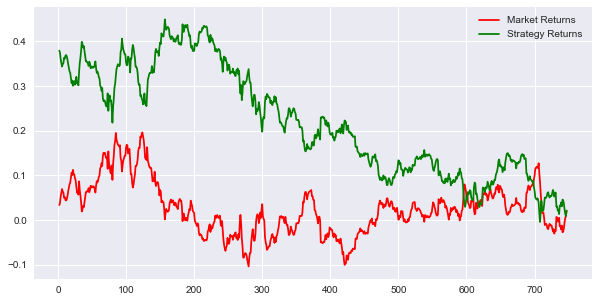

In [260]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Market Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()